<a href="https://colab.research.google.com/github/navneetkrc/GenAI_Concepts/blob/main/Chunking_Strategies/Chunking_comparisons_naive_vs_late_vs_contextual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Introduction: Late Chunking vs Contextual Chunking

In retrieval-augmented generation (RAG), effectively embedding documents for retrieval is critical to maintaining semantic accuracy. Traditional chunking methods often fragment the broader context of a document, leading to retrieval failures and reduced relevance. To address this, two advanced strategies—**Late Chunking** and **Contextual Retrieval**—have emerged, each with unique approaches to preserving document context.

- **Late Chunking** embeds the entire document first, ensuring that chunk embeddings retain global context before splitting. This method is efficient and works well within the context window of embedding models.
- **Contextual Retrieval**, on the other hand, enriches individual chunks by adding context summaries generated by large language models (LLMs). This approach is particularly effective for long documents that exceed model context windows, enabling more nuanced and accurate retrieval.

Both methods aim to mitigate the semantic loss inherent in naive chunking, with Late Chunking excelling in speed and simplicity, while Contextual Retrieval offers enhanced accuracy for complex queries. This notebook will explore these strategies through code implementations and their practical applications in RAG systems.





In [12]:
# Cell 1: Install sentence-transformers
!pip install -q sentence-transformers


In [13]:
# Cell 2: Import necessary libraries and initialize the embedding model on CPU
from sentence_transformers import SentenceTransformer

# Initialize the embedding model on CPU
embedding_model = SentenceTransformer('all-MiniLM-L6-v2', device='cpu')


In [14]:
# Cell 3: Define Late Chunking function with truncation safeguard
def late_chunking(document, chunk_size=512):
    """
    Embed the entire document first, then split into chunks.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum token size for each chunk.
    Returns:
        list: List of embeddings for each chunk.
    """
    # Truncate document if too long for embedding model
    max_length = 512  # Adjust based on model's token limit
    truncated_document = document[:max_length]

    # Embed the truncated document
    document_embedding = embedding_model.encode(truncated_document)

    # Split into chunks based on chunk size
    chunks = [truncated_document[i:i + chunk_size] for i in range(0, len(truncated_document), chunk_size)]

    # Map each chunk to the same embedding
    return [(chunk, document_embedding) for chunk in chunks]


In [15]:
# Cell 4: Test Late Chunking function
# sample_document = """Late Chunking and Contextual Chunking are advanced strategies used in retrieval-augmented generation systems.
# These methods aim to preserve semantic accuracy by addressing the limitations of naive text splitting."""

sample_document = """
## Samsung Galaxy S25 Support Documentation: Common Issues and Solutions

The Samsung Galaxy S25 series, including the S25, S25+, and S25 Ultra, is a flagship lineup packed with advanced features. However, like any new smartphone release, users have reported various issues. This support document outlines common problems, troubleshooting steps, and solutions to ensure optimal performance.

---

### **Common Issues with the Galaxy S25 Series**

#### **1. Display Issues**
- **Problems:** Users have reported scrolling lag, screen flickering, and dim brightness.
- **Causes:** These issues are often software-related or linked to display settings.
- **Solutions:**
  - Disable Always-On Display (AOD) by entering Safe Mode and uninstalling the AOD app[5][8].
  - Adjust screen brightness in *Settings > Display > Screen mode* and use the Vividness slider for preferred color tuning[8].
  - Increase touch sensitivity via *Settings > Display* if taps are missed or scrolling feels unresponsive[8].

#### **2. Overheating**
- **Problems:** Some Galaxy S25 devices experience overheating during intensive use.
- **Causes:** Likely related to the Snapdragon 8 Elite chipset or high-performance settings.
- **Solutions:**
  - Avoid using the device in direct sunlight or while charging.
  - Enable power-saving mode in *Settings > Battery* to reduce strain on the processor[3][9].
  - Check for software updates that may address chipset optimization[9].

#### **3. Camera Problems**
- **Problems:** Issues include streaks in photos taken under strong light conditions and inconsistent autofocus.
- **Causes:** Software bugs or hardware calibration errors.
- **Solutions:**
  - Update camera software via *Settings > Software Update*[3][9].
  - Clear cache for the camera app in *Settings > Apps > Camera > Storage > Clear Cache*[4].
  - If problems persist, visit a Samsung service center for hardware inspection[9].

#### **4. Battery Drain**
- **Problems:** Faster-than-expected battery depletion even under moderate usage.
- **Causes:** High refresh rates, background apps, or Always-On Display.
- **Solutions:**
  - Check battery usage in *Settings > Battery and Device Care* and restrict power-hungry apps[9].
  - Reduce refresh rate to Adaptive or Standard mode via *Settings > Display*[9].
  - Disable features like Always-On Display and Location Services when not needed[9].

#### **5. App Notification Delays**
- **Problems:** Notifications from apps like WhatsApp and Facebook are delayed.
- **Causes:** Battery optimization settings or app-specific bugs.
- **Solutions:**
  - Disable battery optimization for affected apps in *Settings > Battery > Background Usage Limits*[5].
  - Ensure Do Not Disturb mode is turned off[9].
  - Update apps to their latest versions via Google Play Store[3].

#### **6. Android Auto Connectivity Issues**
- **Problems:** Some users report that Android Auto fails to recognize the device.
- **Causes:** Compatibility issues with car head units or software bugs.
- **Solutions:**
  - Try a different USB cable or port.
  - Clear cache for Android Auto via *Settings > Apps > Android Auto > Storage > Clear Cache*[4].
  - Wait for updates from Google to address compatibility issues[3].

---

### **Troubleshooting Steps**

#### **Soft Reset (Force Restart)**
If your device becomes unresponsive:
1. Press and hold the Volume Down key + Side key simultaneously for at least 7 seconds until the phone restarts[4].

#### **Clear App Cache**
To resolve app-related issues:
1. Navigate to *Settings > Battery and Device Care*.
2. Tap "Optimize Now" to clear cache data[4].

#### **Factory Reset**
To resolve persistent problems:
1. Go to *Settings > General Management > Reset > Factory Data Reset*.
2. Confirm reset after backing up important data, as this erases all personal information[5][6].

#### **Safe Mode Troubleshooting**
For issues caused by third-party apps:
1. Restart into Safe Mode by holding Volume Down + Side key until the Samsung logo appears.
2. Uninstall problematic apps via *Settings > Apps*[4][5].

---

### **Hardware-Specific Features**

#### Galaxy S25 Ultra
The Ultra model includes unique features such as:
- S Pen functionality for advanced productivity tasks[2].
- Enhanced camera capabilities like macro photography and 8K video recording[7].

#### Wireless Charging
All models support wireless charging but may require removing accessories or cases for stable charging performance[2].

---

### **Service Center Support**
If troubleshooting fails:
1. Visit a Samsung service center for hardware repairs or replacements.
2. Check service center wait times online to minimize delays[4].

---

### Conclusion
The Samsung Galaxy S25 series offers cutting-edge technology but may encounter occasional issues typical of new devices. By following these troubleshooting steps and solutions, users can resolve most problems efficiently while maximizing their smartphone experience. For unresolved issues, professional assistance is available through Samsung service centers.



"""

# Apply Late Chunking
late_chunks = late_chunking(sample_document)

# Print results
print("Late Chunking Results:")
for chunk, embedding in late_chunks:
    print(f"Chunk: {chunk}\nEmbedding Length: {len(embedding)}\n")


Late Chunking Results:
Chunk: 
## Samsung Galaxy S25 Support Documentation: Common Issues and Solutions

The Samsung Galaxy S25 series, including the S25, S25+, and S25 Ultra, is a flagship lineup packed with advanced features. However, like any new smartphone release, users have reported various issues. This support document outlines common problems, troubleshooting steps, and solutions to ensure optimal performance.

---

### **Common Issues with the Galaxy S25 Series**

#### **1. Display Issues**
- **Problems:** Users have reported s
Embedding Length: 384



In [16]:
# Cell 5: Modify Contextual Chunking function with truncation safeguard
from transformers import pipeline

# Initialize summarizer on CPU for debugging
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)

def contextual_chunking(document, chunk_size=512):
    """
    Generate context-aware chunks by summarizing the document and appending summaries to each chunk.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum token size for each chunk.
    Returns:
        list: List of summary-enriched chunks with embeddings.
    """
    # Truncate document if too long for summarizer
    max_length = 1024  # Adjust based on model's token limit
    truncated_document = document[:max_length]

    # Generate a summary of the truncated document
    summary = summarizer(truncated_document, max_length=150, min_length=30, do_sample=False)[0]['summary_text']

    # Split into chunks based on chunk size
    chunks = [truncated_document[i:i + chunk_size] for i in range(0, len(truncated_document), chunk_size)]

    # Append summary to each chunk and embed them
    enriched_chunks = [chunk + " " + summary for chunk in chunks]

    return [(chunk, embedding_model.encode(chunk)) for chunk in enriched_chunks]

# Test Contextual Chunking function (optional)
contextual_chunks = contextual_chunking(sample_document)
print("\nContextual Chunking Results:")
for chunk, embedding in contextual_chunks:
    print(f"Chunk: {chunk}\nEmbedding Length: {len(embedding)}\n")


Device set to use cpu



Contextual Chunking Results:
Chunk: 
## Samsung Galaxy S25 Support Documentation: Common Issues and Solutions

The Samsung Galaxy S25 series, including the S25, S25+, and S25 Ultra, is a flagship lineup packed with advanced features. However, like any new smartphone release, users have reported various issues. This support document outlines common problems, troubleshooting steps, and solutions to ensure optimal performance.

---

### **Common Issues with the Galaxy S25 Series**

#### **1. Display Issues**
- **Problems:** Users have reported s The Samsung Galaxy S25 series is a flagship lineup packed with advanced features. Like any new smartphone release, users have reported various issues. This support document outlines common problems, troubleshooting steps, and solutions.
Embedding Length: 384

Chunk: crolling lag, screen flickering, and dim brightness.
- **Causes:** These issues are often software-related or linked to display settings.
- **Solutions:**
  - Disable Always-On Displa

In [17]:
# Cell 1: Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Ensure embeddings are available in the DataFrame
# Replace `df` with your actual DataFrame containing embeddings and text data
# Example structure: df['naive_embedding'], df['late_embedding'], df['contextual_embedding'], df['text']

# Cell 2: Extract embeddings from DataFrame
naive_embeds = np.array(df['naive_embedding'].tolist())
late_embeds = np.array(df['late_embedding'].tolist())
contextual_embeds = np.array(df['contextual_embedding'].tolist())

# Cell 3: Generate query and document embeddings
# Replace `get_embeddings` with your actual function to compute embeddings
query_embedding = get_embeddings(["Your query text"], late_chunking=False)[0]
document_embedding = get_embeddings(["Your document text"], late_chunking=False)[0]

# Cell 4: Stack all embeddings into one array for PCA
all_embeds = np.vstack([
    naive_embeds,
    late_embeds,
    contextual_embeds,
    query_embedding,  # Query embedding
    document_embedding  # Document embedding
])

# Create labels for visualization
labels = (
    ['Naive'] * len(naive_embeds) +
    ['Late'] * len(late_embeds) +
    ['Contextual'] * len(contextual_embeds) +
    ['Query'] +
    ['Document']
)

# Cell 5: Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeds)

# Split the reduced embeddings by type for plotting
naive_2d = embeddings_2d[:len(naive_embeds)]
late_2d = embeddings_2d[len(naive_embeds):len(naive_embeds) + len(late_embeds)]
contextual_2d = embeddings_2d[len(naive_embeds) + len(late_embeds):-2]
query_2d = embeddings_2d[-2:-1]
document_2d = embeddings_2d[-1:]

# Helper function to adjust text positions for clarity in visualization
def adjust_text_positions(positions, offset):
    return [pos + offset for pos in positions]

# Cell 6: Create scatter plot using Plotly
fig = go.Figure()

# Add Naive embeddings to the plot
fig.add_trace(go.Scatter(
    x=adjust_text_positions(naive_2d[:, 0], 0.1),
    y=adjust_text_positions(naive_2d[:, 1], 0.1),
    mode='markers+text',
    name='Naive',
    text=df['text'],  # Replace with actual text column from your DataFrame
    textposition="top center",
    marker=dict(size=10, opacity=0.8)
))

# Add Late embeddings to the plot
fig.add_trace(go.Scatter(
    x=adjust_text_positions(late_2d[:, 0], -0.1),
    y=adjust_text_positions(late_2d[:, 1], -0.1),
    mode='markers+text',
    name='Late',
    text=df['text'],  # Replace with actual text column from your DataFrame
    textposition="bottom center",
    marker=dict(size=10, opacity=0.8)
))

# Add Contextual embeddings to the plot
fig.add_trace(go.Scatter(
    x=adjust_text_positions(contextual_2d[:, 0], 0.15),
    y=adjust_text_positions(contextual_2d[:, 1], -0.15),
    mode='markers+text',
    name='Contextual',
    text=df['text'],  # Replace with actual text column from your DataFrame
    textposition="top right",
    marker=dict(size=10, opacity=0.8)
))

# Add Query embedding to the plot
fig.add_trace(go.Scatter(
    x=query_2d[:, 0],
    y=query_2d[:, 1],
    mode='markers+text',
    name='Query',
    text=['Query'],  # Label for query embedding point
    textposition="top center",
    marker=dict(size=15, symbol='star', opacity=1.0)
))

# Add Document embedding to the plot
fig.add_trace(go.Scatter(
    x=document_2d[:, 0],
    y=document_2d[:, 1],
    mode='markers+text',
    name='Document',
    text=['Document'],  # Label for document embedding point
    textposition="top center",
    marker=dict(size=15, symbol='diamond', opacity=1.0)
))

# Cell 7: Update layout for better visualization clarity
fig.update_layout(
    title="PCA Visualization of Different Embedding Strategies",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
    width=1000,
    height=800,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    margin=dict(l=50, r=50, t=100, b=50),
)

# Display the plot
fig.show()


NameError: name 'df' is not defined

#Google AI Studio

In [22]:
# Cell 1: Install necessary libraries (allowing pip to resolve compatible versions)
!pip install sentence-transformers transformers torch plotly scikit-learn numpy pandas -q

In [23]:
# Cell 2: Import libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import torch # Used implicitly by transformers and sentence-transformers

# Determine device
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")


Using device: cuda


In [24]:
# Cell 3: Initialize models
# Initialize the embedding model
# Using a specific version for reproducibility if needed, adjust model name as desired
embedding_model = SentenceTransformer('all-MiniLM-L6-v2', device=DEVICE)

# Initialize summarizer pipeline (use device index if GPU available, -1 for CPU)
summarizer_device = 0 if DEVICE == "cuda" else -1
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=summarizer_device)

Device set to use cuda:0


In [25]:
# Cell 4: Define Naive Chunking function
def naive_chunking(document, chunk_size=256): # Using a smaller chunk size for more distinct points
    """
    Split the document into chunks first, then embed each chunk individually.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum token size for each chunk (approximation based on characters).
    Returns:
        list: List of dictionaries, each containing 'text' and 'embedding'.
    """
    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]

    results = []
    for chunk in chunks:
        if chunk.strip(): # Ensure chunk is not just whitespace
            embedding = embedding_model.encode(chunk)
            results.append({'text': chunk, 'embedding': embedding, 'strategy': 'Naive'})

    return results

In [26]:
# Cell 5: Define Late Chunking function (Revised with clearer truncation)
def late_chunking(document, chunk_size=256): # Using same smaller chunk size
    """
    Embed a larger portion (or whole, if possible) of the document first,
    then split the text into chunks, assigning the *same* embedding to each.
    Note: This simplified version embeds only the initial part up to the model's limit.
          More advanced late chunking might embed overlapping larger windows.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum character size for final text chunks.
    Returns:
        list: List of dictionaries, each containing 'text' and 'embedding'.
    """
    # Determine max sequence length for the embedding model
    # Some models might not have this attribute explicitly, use a default or check model card
    try:
        # Attempt to get max_seq_length, handle potential AttributeError
        max_length = embedding_model.max_seq_length
    except AttributeError:
        print("Warning: embedding_model.max_seq_length not found. Using default 512.")
        max_length = 512 # Default if attribute not present

    # Truncate document if it exceeds the model's input limit
    truncated_document = document[:max_length * 4] # Heuristic: chars approx 4x tokens
    if len(document) > len(truncated_document):
         print(f"Warning: Document truncated for Late Chunking embedding to ~{len(truncated_document)} chars.")

    # Embed the potentially truncated document
    # Use convert_to_numpy=True for easier handling later
    document_embedding = embedding_model.encode(truncated_document, convert_to_numpy=True)

    # Split the *original* document text into chunks
    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]

    results = []
    for chunk in chunks:
       if chunk.strip():
            # Assign the single document embedding to each chunk
            results.append({'text': chunk, 'embedding': document_embedding, 'strategy': 'Late'})

    return results

In [27]:
# Cell 6: Define Contextual Chunking function (Revised with clearer truncation)
def contextual_chunking(document, chunk_size=256): # Using same smaller chunk size
    """
    Generate context-aware chunks by summarizing the document and appending
    the summary to each chunk *before* embedding.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum character size for text chunks (before adding summary).
    Returns:
        list: List of dictionaries, each containing 'text' (original chunk) and 'embedding' (of chunk + summary).
    """
    # Summarizer often has its own limits (e.g., BART ~1024 tokens)
    # Truncate document if too long for summarizer input
    # Using a safe limit for BART
    max_summary_input_length = 1024 * 4 # Heuristic: chars approx 4x tokens
    truncated_for_summary = document[:max_summary_input_length]
    if len(document) > len(truncated_for_summary):
        print(f"Warning: Document truncated for summarization to ~{len(truncated_for_summary)} chars.")

    # Generate a summary of the (potentially truncated) document
    # Handle potential errors during summarization
    try:
        summary = summarizer(truncated_for_summary, max_length=130, min_length=20, do_sample=False)[0]['summary_text']
    except Exception as e:
        print(f"Error during summarization: {e}. Using empty summary.")
        summary = ""

    # Split the *original* document into chunks
    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]

    results = []
    for chunk in chunks:
       if chunk.strip():
            # Create the enriched text for embedding
            enriched_chunk_for_embedding = chunk + " [CONTEXT_SUMMARY] " + summary

            # Embed the enriched chunk
            embedding = embedding_model.encode(enriched_chunk_for_embedding, convert_to_numpy=True)

            # Store the *original* chunk text but the *enriched* embedding
            results.append({'text': chunk, 'embedding': embedding, 'strategy': 'Contextual'})

    return results

In [28]:
# Cell 7: Define the Sample Document
sample_document = """
## Samsung Galaxy S25 Support Documentation: Common Issues and Solutions

The Samsung Galaxy S25 series, including the S25, S25+, and S25 Ultra, is a flagship lineup packed with advanced features. However, like any new smartphone release, users have reported various issues. This support document outlines common problems, troubleshooting steps, and solutions to ensure optimal performance.

---

### **Common Issues with the Galaxy S25 Series**

#### **1. Display Issues**
- **Problems:** Users have reported scrolling lag, screen flickering, and dim brightness.
- **Causes:** These issues are often software-related or linked to display settings.
- **Solutions:**
  - Disable Always-On Display (AOD) by entering Safe Mode and uninstalling the AOD app[5][8].
  - Adjust screen brightness in *Settings > Display > Screen mode* and use the Vividness slider for preferred color tuning[8].
  - Increase touch sensitivity via *Settings > Display* if taps are missed or scrolling feels unresponsive[8].

#### **2. Overheating**
- **Problems:** Some Galaxy S25 devices experience overheating during intensive use.
- **Causes:** Likely related to the Snapdragon 8 Elite chipset or high-performance settings.
- **Solutions:**
  - Avoid using the device in direct sunlight or while charging.
  - Enable power-saving mode in *Settings > Battery* to reduce strain on the processor[3][9].
  - Check for software updates that may address chipset optimization[9].

#### **3. Camera Problems**
- **Problems:** Issues include streaks in photos taken under strong light conditions and inconsistent autofocus.
- **Causes:** Software bugs or hardware calibration errors.
- **Solutions:**
  - Update camera software via *Settings > Software Update*[3][9].
  - Clear cache for the camera app in *Settings > Apps > Camera > Storage > Clear Cache*[4].
  - If problems persist, visit a Samsung service center for hardware inspection[9].

#### **4. Battery Drain**
- **Problems:** Faster-than-expected battery depletion even under moderate usage.
- **Causes:** High refresh rates, background apps, or Always-On Display.
- **Solutions:**
  - Check battery usage in *Settings > Battery and Device Care* and restrict power-hungry apps[9].
  - Reduce refresh rate to Adaptive or Standard mode via *Settings > Display*[9].
  - Disable features like Always-On Display and Location Services when not needed[9].

#### **5. App Notification Delays**
- **Problems:** Notifications from apps like WhatsApp and Facebook are delayed.
- **Causes:** Battery optimization settings or app-specific bugs.
- **Solutions:**
  - Disable battery optimization for affected apps in *Settings > Battery > Background Usage Limits*[5].
  - Ensure Do Not Disturb mode is turned off[9].
  - Update apps to their latest versions via Google Play Store[3].

#### **6. Android Auto Connectivity Issues**
- **Problems:** Some users report that Android Auto fails to recognize the device.
- **Causes:** Compatibility issues with car head units or software bugs.
- **Solutions:**
  - Try a different USB cable or port.
  - Clear cache for Android Auto via *Settings > Apps > Android Auto > Storage > Clear Cache*[4].
  - Wait for updates from Google to address compatibility issues[3].

---

### **Troubleshooting Steps**

#### **Soft Reset (Force Restart)**
If your device becomes unresponsive:
1. Press and hold the Volume Down key + Side key simultaneously for at least 7 seconds until the phone restarts[4].

#### **Clear App Cache**
To resolve app-related issues:
1. Navigate to *Settings > Battery and Device Care*.
2. Tap "Optimize Now" to clear cache data[4].

#### **Factory Reset**
To resolve persistent problems:
1. Go to *Settings > General Management > Reset > Factory Data Reset*.
2. Confirm reset after backing up important data, as this erases all personal information[5][6].

#### **Safe Mode Troubleshooting**
For issues caused by third-party apps:
1. Restart into Safe Mode by holding Volume Down + Side key until the Samsung logo appears.
2. Uninstall problematic apps via *Settings > Apps*[4][5].

---

### **Hardware-Specific Features**

#### Galaxy S25 Ultra
The Ultra model includes unique features such as:
- S Pen functionality for advanced productivity tasks[2].
- Enhanced camera capabilities like macro photography and 8K video recording[7].

#### Wireless Charging
All models support wireless charging but may require removing accessories or cases for stable charging performance[2].

---

### **Service Center Support**
If troubleshooting fails:
1. Visit a Samsung service center for hardware repairs or replacements.
2. Check service center wait times online to minimize delays[4].

---

### Conclusion
The Samsung Galaxy S25 series offers cutting-edge technology but may encounter occasional issues typical of new devices. By following these troubleshooting steps and solutions, users can resolve most problems efficiently while maximizing their smartphone experience. For unresolved issues, professional assistance is available through Samsung service centers.
"""


In [29]:
# Cell 8: Define Sample Query and Chunk Size
sample_query = "How to fix overheating on Galaxy S25?"
chunk_size = 256 # Adjust as needed, smaller makes visualization denser

In [30]:
# Cell 9: Run all chunking methods and collect results
all_results = []

print("Running Naive Chunking...")
naive_results = naive_chunking(sample_document, chunk_size)
all_results.extend(naive_results)
print(f"Generated {len(naive_results)} Naive chunks.")

print("\nRunning Late Chunking...")
late_results = late_chunking(sample_document, chunk_size)
all_results.extend(late_results)
print(f"Generated {len(late_results)} Late chunks.")


print("\nRunning Contextual Chunking...")
contextual_results = contextual_chunking(sample_document, chunk_size)
all_results.extend(contextual_results)
print(f"Generated {len(contextual_results)} Contextual chunks.")

# Create a DataFrame (optional, but can be convenient)
df_results = pd.DataFrame(all_results)
# display(df_results.head()) # Uncomment to view the structure

Running Naive Chunking...
Generated 20 Naive chunks.

Running Late Chunking...
Generated 20 Late chunks.

Running Contextual Chunking...
Generated 20 Contextual chunks.


In [31]:
# Cell 10: Prepare data for Visualization
# Extract data needed for plotting
chunk_texts = [res['text'] for res in all_results]
embeddings = np.array([res['embedding'] for res in all_results])
strategies = [res['strategy'] for res in all_results]

# Embed the query
query_embedding = embedding_model.encode(sample_query, convert_to_numpy=True)

# Embed the *entire* document (or truncated version) for reference
try:
    max_length = embedding_model.max_seq_length
except AttributeError:
    max_length = 512
doc_ref_text = sample_document[:max_length * 4] # Use same truncation logic as Late Chunking embedding
document_embedding_ref = embedding_model.encode(doc_ref_text, convert_to_numpy=True)


# Stack all embeddings for PCA: Chunks + Query + Document Reference
all_embeddings_for_pca = np.vstack([
    embeddings,
    query_embedding.reshape(1, -1), # Reshape query to 2D array
    document_embedding_ref.reshape(1, -1) # Reshape doc ref to 2D array
])

# Create corresponding labels
all_labels = strategies + ['Query', 'Document Reference']
all_hover_texts = chunk_texts + [sample_query, 'Full Document Reference'] # Text for hover info

In [32]:
# Cell 11: Perform PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings_for_pca)
print(f"\nPCA executed. Explained variance ratio: {pca.explained_variance_ratio_}")



PCA executed. Explained variance ratio: [0.23082457 0.16552474]


In [39]:
# Cell 12: Create Visualization with Plotly (REVISED PLOTTING ORDER)
fig = go.Figure()

# Define colors for strategies
color_map = {
    'Naive': 'blue',
    'Late': 'lime', # Changed to brighter green (lime) for visibility
    'Contextual': 'red',
    'Query': 'black',
    'Document Reference': 'purple'
}

# 1. Plot Naive and Contextual chunks as scatter
for strategy in ['Naive', 'Contextual']:
    indices = [i for i, label in enumerate(all_labels) if label == strategy]
    if not indices: continue

    fig.add_trace(go.Scatter(
        x=embeddings_2d[indices, 0],
        y=embeddings_2d[indices, 1],
        mode='markers',
        name=strategy,
        marker=dict(
            color=color_map[strategy],
            size=8,
            opacity=0.7
            ),
        text=[all_hover_texts[i][:100] + '...' if len(all_hover_texts[i])>100 else all_hover_texts[i] for i in indices],
        hoverinfo='text+name'
    ))

# 2. Add Document Reference embedding (PLOTTED BEFORE LATE)
doc_ref_index = -1 # Initialize to invalid index
try:
    doc_ref_index = all_labels.index('Document Reference')
    fig.add_trace(go.Scatter(
        x=[embeddings_2d[doc_ref_index, 0]],
        y=[embeddings_2d[doc_ref_index, 1]],
        mode='markers+text', # Keep text for label
        name='Document Reference',
        text=['<b>Doc Ref</b>'],
        textposition="bottom center",
        marker=dict(
            color=color_map['Document Reference'],
            size=12, # Kept size
            symbol='diamond',
            opacity=0.9),
        hoverinfo='text+name',
        hovertext=['Overall Document Embedding (Reference)']
    ))
except ValueError:
    print("Warning: 'Document Reference' not found in labels.")


# 3. Plot Late Chunks as a SINGLE representative point (PLOTTED AFTER DOC REF)
late_indices = [i for i, label in enumerate(all_labels) if label == 'Late']
if late_indices:
    first_late_index = late_indices[0]
    num_late_chunks = len(late_indices)
    fig.add_trace(go.Scatter(
        x=[embeddings_2d[first_late_index, 0]],
        y=[embeddings_2d[first_late_index, 1]],
        mode='markers', # Just the marker
        name=f'Late (All {num_late_chunks} chunks at this point)',
        marker=dict(
            color=color_map['Late'], # Using 'lime'
            size=14, # Increased size slightly
            symbol='circle-open',
            line=dict(width=3, color='DarkGreen'), # Thicker line
            opacity=1.0 # Make fully opaque
            ),
        text=[f"Represents {num_late_chunks} Late chunks (identical embedding)"],
        hoverinfo='text+name'
    ))
else:
    print("No 'Late' chunks found to plot.")


# 4. Add Query embedding (PLOTTED LAST for prominence)
query_index = -1 # Initialize
try:
    query_index = all_labels.index('Query')
    fig.add_trace(go.Scatter(
        x=[embeddings_2d[query_index, 0]],
        y=[embeddings_2d[query_index, 1]],
        mode='markers+text',
        name='Query',
        text=['<b>Query</b>'],
        textposition="top center",
        marker=dict(
            color=color_map['Query'],
            size=15,
            symbol='star',
            opacity=1.0),
        hoverinfo='text+name',
        hovertext=[all_hover_texts[query_index]]
    ))
except ValueError:
     print("Warning: 'Query' not found in labels.")


# Cell 13: Update layout and show plot (No changes needed here)
fig.update_layout(
    title=f"PCA Visualization of Chunking Strategies (Query: '{sample_query}')",
    xaxis_title=f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2f})",
    yaxis_title=f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2f})",
    width=1000,
    height=800,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    margin=dict(l=50, r=50, t=100, b=50),
    hovermode='closest'
)

fig.show()

**You are absolutely right to question that! Seeing all "Late Chunking" points collapse into one single spot *does* seem counter-intuitive compared to Naive or Contextual chunking, where each chunk gets its own distinct location (or nearly distinct for Contextual).**

However, it's **correct *according to the specific, simplified implementation* of `late_chunking` used in the provided code.** It's not necessarily representative of all possible "late chunking" strategies, but it reflects how *this particular function* works.

Here's the breakdown of why it happens in this code:

1.  **Single Embedding Calculation:**
    *   The `late_chunking` function first takes a large initial portion of the document (up to the model's limit, potentially truncated).
    *   It then calls `embedding_model.encode()` **only once** on this large chunk to get *one single* high-dimensional embedding vector (`document_embedding`). This vector represents the semantic meaning of that initial large piece of text.

2.  **Text Chunking:**
    *   *After* calculating that single embedding, the function splits the *original document text* into smaller chunks based on the `chunk_size`.

3.  **Identical Embedding Assignment:**
    *   The crucial step: For *every single one* of the smaller text chunks generated, the function assigns the **exact same** `document_embedding` vector calculated in step 1.
    *   So, in the `all_results` list, you have multiple entries with `strategy: 'Late'`, each with a different `'text'` field, but they all share the *identical* `'embedding'` field (pointing to the same numpy array in memory).

4.  **PCA Projection:**
    *   PCA takes all the embedding vectors (from Naive, Contextual, Late, Query, Doc Ref) as input.
    *   When PCA encounters multiple input vectors that are *identical* in the high-dimensional space (like all the 'Late' embeddings), it mathematically *must* project them to the **exact same point** in the lower-dimensional (2D) space.

**Why this approach might be used (Simplified Concept):**

The *idea* behind this simplified late chunking is that the embedding derived from the larger initial context (the `document_embedding`) captures the main theme or global context better than tiny individual chunks would. By assigning this "global context" embedding to all chunks, the hope is that even small chunks become searchable based on the overall document theme.

**Why it feels "incorrect" and limitations:**

*   **Loss of Granularity:** You lose the specific semantic meaning of each individual small chunk. A chunk about "Battery Drain" and a chunk about "Camera Problems" end up with the exact same representation, making it impossible to distinguish them based solely on their embedding in this scheme.
*   **Not True "Chunk" Embeddings:** It's slightly misleading terminology. You have chunk *texts*, but they are all associated with a *document-level* (or large-segment-level) embedding.
*   **More Sophisticated Late Chunking:** More advanced late chunking techniques might embed *overlapping* larger windows and assign the embedding of the larger window to the chunk that falls within it, or use other methods. This *would* likely result in slightly different embeddings for different chunks (creating a cluster, not a single point) while still incorporating broader context than naive chunking.

**In Conclusion:**

The visualization is correctly reflecting the output of the provided `late_chunking` function. The function itself implements a very specific, simplified version of the late chunking concept where one embedding is reused for all chunks. This leads to the observed collapse into a single point in the PCA plot. It highlights a trade-off: potential capture of global context at the cost of losing local, chunk-specific semantic detail in the embedding itself.

In [40]:
# Cell 13: Update layout and show plot
fig.update_layout(
    title=f"PCA Visualization of Chunking Strategies (Query: '{sample_query}')",
    xaxis_title=f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2f})",
    yaxis_title=f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2f})",
    width=1000,
    height=800,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    margin=dict(l=50, r=50, t=100, b=50),
    hovermode='closest' # Show hover for the nearest point
)

fig.show()

Cell 14: Interpretation
"""
### Interpreting the Visualization:

1.  **Proximity to Query:** Observe which strategy's chunks (dots of a specific color) cluster closest to the Query marker (black star). Chunks closer in the embedding space are generally considered more semantically similar by the model. This suggests which strategy might yield more relevant results for this specific query.
2.  **Cluster Cohesion:** Look at how tightly clustered the chunks are for each strategy.
    *   **Naive:** Often shows more scatter, as each chunk's embedding is independent.
    *   **Late:** Chunks will overlap perfectly in this *simplified* implementation because they share the exact same embedding. More advanced late chunking would show clusters around different larger segment embeddings.
    *   **Contextual:** May show tighter clustering than Naive if the added summary successfully pulls related chunks together, or could shift chunks based on the summary's influence.
3.  **Relation to Document Reference:** Compare the chunk clusters to the Document Reference marker (purple diamond). This shows how well individual chunks represent the overall document's semantic meaning according to the embedding model. Late chunking (in this simplified form) forces all chunks to this point. Naive and Contextual chunks might be closer or further depending on their specific content.
4.  **Outliers:** Identify any chunks that are far away from their strategy's main cluster or the query. These might represent less relevant parts of the document or areas where the chunking strategy struggled.

**Limitations:**
*   **PCA Projection:** PCA reduces high-dimensional embeddings (e.g., 384 dimensions for MiniLM) to 2D, inevitably losing some information. Distances in the 2D plot are approximations.
*   **Simplified Late Chunking:** The implementation here uses one embedding for the whole (truncated) document. True late chunking often involves more complex strategies like embedding overlapping larger windows.
*   **Single Document/Query:** This visualization is based on one document and one query. Results can vary significantly with different content and queries.
*   **Model Dependence:** The results heavily depend on the chosen embedding model (`all-MiniLM-L6-v2`) and summarizer (`bart-large-cnn`).
"""

# Updated Code by Google AI Studio

In [ ]:
# Cell 1: Install necessary libraries (allowing pip to resolve compatible versions)
!pip install sentence-transformers transformers torch plotly scikit-learn numpy pandas -q

In [2]:
# Cell 2: Import libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

Using device: cuda


In [4]:
# Cell 3: Initialize models
# Initialize the embedding model
embedding_model = SentenceTransformer('nomic-ai/nomic-embed-text-v1.5', device=DEVICE,trust_remote_code=True)

# Initialize summarizer pipeline (use device index if GPU available, -1 for CPU)
summarizer_device = 0 if DEVICE == "cuda" else -1
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=summarizer_device)

print("Models Initialized.")
print(f"Embedding Model Max Sequence Length: {getattr(embedding_model, 'max_seq_length', 'Not Specified (Using Default)')}")

configuration_hf_nomic_bert.py:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- configuration_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_hf_nomic_bert.py:   0%|          | 0.00/103k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- modeling_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/547M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


Models Initialized.
Embedding Model Max Sequence Length: 8192


In [5]:
# Cell 4: Define Naive Chunking function
def naive_chunking(document, chunk_size=256):
    """
    Split the document into chunks first, then embed each chunk individually.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum character size for each chunk (approximation).
    Returns:
        list: List of dictionaries, each containing 'text' and 'embedding'.
    """
    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
    results = []
    print(f"  Naive Chunking: Processing {len(chunks)} potential chunks...")
    count = 0
    for chunk in chunks:
        if chunk.strip(): # Ensure chunk is not just whitespace
            embedding = embedding_model.encode(chunk, convert_to_numpy=True) # Ensure numpy array
            results.append({'text': chunk, 'embedding': embedding, 'strategy': 'Naive'})
            count += 1
    print(f"  Naive Chunking: Generated {count} embeddings.")
    return results

In [6]:
# Cell 5: Define Late Chunking function (REVISED - Addressing Truncation)
def late_chunking(document, chunk_size=256, target_max_length=4096): # Add target_max_length
    """
    Implements Late Chunking by embedding the full document to get token embeddings,
    then pooling token embeddings corresponding to each chunk. Attempts to use a
    longer context window.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Approximate character size for defining chunk boundaries.
        target_max_length (int): The desired maximum sequence length to attempt.
    Returns:
        list: List of dictionaries, each containing 'text' and 'embedding'.
    """
    print(f"  Late Chunking: Attempting token pooling with target_max_length={target_max_length}...")
    # 1. Tokenize the entire document and get token embeddings
    if not hasattr(embedding_model, 'tokenizer') or not hasattr(embedding_model, 'encode'):
         print("  Late Chunking Error: Embedding model missing 'tokenizer' or 'encode'.")
         raise AttributeError("Embedding model must have a 'tokenizer' attribute and 'encode' method.")

    # Use the provided target_max_length for tokenization and embedding attempt
    effective_max_length = target_max_length

    try:
        print(f"  Late Chunking: Tokenizing document (attempting max_length={effective_max_length})...")
        # Explicitly pass the desired max_length to the tokenizer
        tokenized_full = embedding_model.tokenizer(
            document,
            return_offsets_mapping=True,
            return_tensors='pt',
            truncation=True,
            max_length=effective_max_length # USE THE TARGET LENGTH HERE
        ).to(embedding_model.device)
        num_tokens = tokenized_full['input_ids'].shape[1]
        # The actual number of tokens might still be less if the doc is short, or limited by the model's absolute max
        print(f"  Late Chunking: Document tokenized into {num_tokens} tokens (respecting truncation limit).")

        print(f"  Late Chunking: Encoding document to get token embeddings...")
        with torch.no_grad():
             # Ensure encode also respects truncation, possibly via model's internal config
             # SentenceTransformer's encode might not directly accept max_length, relies on tokenizer
             outputs = embedding_model.encode(
                 document,
                 output_value='token_embeddings',
                 convert_to_tensor=True,
                 batch_size=1,
                 truncate=True # Essential to prevent errors if doc exceeds absolute limit
                ).to(embedding_model.device) # Move output to correct device

        print(f"  Late Chunking: Raw token embedding output shape: {outputs.shape}")
        # The output shape's token dimension should now reflect the *actual* number of tokens processed up to effective_max_length
        if len(outputs.shape) == 3 and outputs.shape[0] == 1:
            token_embeddings = outputs[0]
        elif len(outputs.shape) == 2:
             # Handle case where batch dim might already be squeezed by encode
             if outputs.shape[0] != num_tokens:
                  print(f"  Late Chunking Warning: Token count mismatch between tokenizer ({num_tokens}) and embedding output ({outputs.shape[0]}). Using embedding output count.")
                  # This might happen if encode internally truncated differently
             token_embeddings = outputs
        else:
             print(f"  Late Chunking Error: Unexpected shape for token embeddings: {outputs.shape}")
             raise ValueError(f"Unexpected shape for token embeddings: {outputs.shape}")
        print(f"  Late Chunking: Processed token embedding shape: {token_embeddings.shape}")

        # Ensure offset mapping matches the actual token embeddings dimension
        offset_mapping = tokenized_full['offset_mapping'][0,:token_embeddings.shape[0]].cpu().numpy() # Slice offsets to match actual tokens

    except Exception as e:
        print(f"  Late Chunking Error: Failed getting token embeddings or offset mapping: {e}")
        print("  Late Chunking: Falling back to simplified mode (single embedding).")
        # Fallback to the previous simplified method
        fallback_max_len = 512 # Use a reasonable default for fallback
        try:
            model_max_len_attr = embedding_model.max_seq_length
            if model_max_len_attr: fallback_max_len = model_max_len_attr
        except AttributeError: pass # Ignore if attribute missing
        truncated_document = document[:fallback_max_len * 4] # Heuristic
        document_embedding = embedding_model.encode(truncated_document, convert_to_numpy=True)
        chunks_text = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
        results = [{'text': chunk, 'embedding': document_embedding, 'strategy': 'Late'} for chunk in chunks_text if chunk.strip()]
        print(f"  Late Chunking (Fallback): Generated {len(results)} embeddings.")
        return results

    # 2. Define character-level chunk boundaries (Same as before)
    chunks_text_boundaries = []
    for i in range(0, len(document), chunk_size):
        start_char = i
        end_char = i + chunk_size
        chunk_text = document[start_char:end_char]
        if chunk_text.strip():
            chunks_text_boundaries.append({
                'text': chunk_text,
                'start_char': start_char,
                'end_char': end_char
            })
    print(f"  Late Chunking: Defined {len(chunks_text_boundaries)} text chunk boundaries.")

    # 3. Map char boundaries to token boundaries and pool token embeddings (Same logic, but now with potentially more tokens)
    results = []
    token_embeddings_np = token_embeddings.cpu().numpy()

    for chunk_info in chunks_text_boundaries:
        start_char = chunk_info['start_char']
        end_char = chunk_info['end_char']
        token_indices = []
        for idx, (token_start, token_end) in enumerate(offset_mapping): # Use potentially sliced offset_mapping
            if token_start == 0 and token_end == 0: continue
            if token_start < end_char and token_end > start_char:
                 if idx < token_embeddings_np.shape[0]: # Double check index validity
                     token_indices.append(idx)

        if token_indices:
            chunk_token_embeddings = token_embeddings_np[token_indices]
            chunk_embedding = np.mean(chunk_token_embeddings, axis=0)
            results.append({
                'text': chunk_info['text'],
                'embedding': chunk_embedding,
                'strategy': 'Late'
            })

    # Same fallback logic if pooling still yields no results
    if not results and chunks_text_boundaries:
         print("  Late Chunking Warning: Failed to generate any embeddings using token pooling (even after trying target length). Falling back to simplified mode.")
         # Fallback
         fallback_max_len = 512
         try:
            model_max_len_attr = embedding_model.max_seq_length
            if model_max_len_attr: fallback_max_len = model_max_len_attr
         except AttributeError: pass
         truncated_document = document[:fallback_max_len * 4]
         document_embedding = embedding_model.encode(truncated_document, convert_to_numpy=True)
         chunks_text = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
         results = [{'text': chunk, 'embedding': document_embedding, 'strategy': 'Late'} for chunk in chunks_text if chunk.strip()]
         print(f"  Late Chunking (Fallback): Generated {len(results)} embeddings.")
    else:
        print(f"  Late Chunking (Token Pooling): Generated {len(results)} embeddings.") # This count should be higher now

    return results

In [7]:
# Cell 6: Define Contextual Chunking function
def contextual_chunking(document, chunk_size=256):
    """
    Generate context-aware chunks by summarizing the document and appending
    the summary to each chunk *before* embedding.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum character size for text chunks (before adding summary).
    Returns:
        list: List of dictionaries, each containing 'text' (original chunk) and 'embedding' (of chunk + summary).
    """
    print(f"  Contextual Chunking: Generating summary...")
    # Summarizer often has its own limits (e.g., BART ~1024 tokens)
    max_summary_input_length = 1024 * 4 # Heuristic
    truncated_for_summary = document[:max_summary_input_length]
    if len(document) > len(truncated_for_summary):
        print(f"  Contextual Chunking Warning: Document truncated for summarization to ~{len(truncated_for_summary)} chars.")

    # Generate a summary
    try:
        summary = summarizer(truncated_for_summary, max_length=130, min_length=20, do_sample=False)[0]['summary_text']
        print(f"  Contextual Chunking: Summary generated.")
    except Exception as e:
        print(f"  Contextual Chunking Error during summarization: {e}. Using empty summary.")
        summary = ""

    # Split the *original* document into chunks
    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
    print(f"  Contextual Chunking: Processing {len(chunks)} potential chunks...")
    results = []
    count = 0
    for chunk in chunks:
       if chunk.strip():
            # Create the enriched text for embedding
            enriched_chunk_for_embedding = chunk + " [CONTEXT_SUMMARY] " + summary
            # Embed the enriched chunk
            embedding = embedding_model.encode(enriched_chunk_for_embedding, convert_to_numpy=True)
            # Store the *original* chunk text but the *enriched* embedding
            results.append({'text': chunk, 'embedding': embedding, 'strategy': 'Contextual'})
            count += 1
    print(f"  Contextual Chunking: Generated {count} embeddings.")
    return results

In [8]:
# Cell 7: Define the Sample Document
sample_document = """
## Samsung Galaxy S25 Support Documentation: Common Issues and Solutions

The Samsung Galaxy S25 series, including the S25, S25+, and S25 Ultra, is a flagship lineup packed with advanced features. However, like any new smartphone release, users have reported various issues. This support document outlines common problems, troubleshooting steps, and solutions to ensure optimal performance.

---

### **Common Issues with the Galaxy S25 Series**

#### **1. Display Issues**
- **Problems:** Users have reported scrolling lag, screen flickering, and dim brightness.
- **Causes:** These issues are often software-related or linked to display settings.
- **Solutions:**
  - Disable Always-On Display (AOD) by entering Safe Mode and uninstalling the AOD app[5][8].
  - Adjust screen brightness in *Settings > Display > Screen mode* and use the Vividness slider for preferred color tuning[8].
  - Increase touch sensitivity via *Settings > Display* if taps are missed or scrolling feels unresponsive[8].

#### **2. Overheating**
- **Problems:** Some Galaxy S25 devices experience overheating during intensive use.
- **Causes:** Likely related to the Snapdragon 8 Elite chipset or high-performance settings.
- **Solutions:**
  - Avoid using the device in direct sunlight or while charging.
  - Enable power-saving mode in *Settings > Battery* to reduce strain on the processor[3][9].
  - Check for software updates that may address chipset optimization[9].

#### **3. Camera Problems**
- **Problems:** Issues include streaks in photos taken under strong light conditions and inconsistent autofocus.
- **Causes:** Software bugs or hardware calibration errors.
- **Solutions:**
  - Update camera software via *Settings > Software Update*[3][9].
  - Clear cache for the camera app in *Settings > Apps > Camera > Storage > Clear Cache*[4].
  - If problems persist, visit a Samsung service center for hardware inspection[9].

#### **4. Battery Drain**
- **Problems:** Faster-than-expected battery depletion even under moderate usage.
- **Causes:** High refresh rates, background apps, or Always-On Display.
- **Solutions:**
  - Check battery usage in *Settings > Battery and Device Care* and restrict power-hungry apps[9].
  - Reduce refresh rate to Adaptive or Standard mode via *Settings > Display*[9].
  - Disable features like Always-On Display and Location Services when not needed[9].

#### **5. App Notification Delays**
- **Problems:** Notifications from apps like WhatsApp and Facebook are delayed.
- **Causes:** Battery optimization settings or app-specific bugs.
- **Solutions:**
  - Disable battery optimization for affected apps in *Settings > Battery > Background Usage Limits*[5].
  - Ensure Do Not Disturb mode is turned off[9].
  - Update apps to their latest versions via Google Play Store[3].

#### **6. Android Auto Connectivity Issues**
- **Problems:** Some users report that Android Auto fails to recognize the device.
- **Causes:** Compatibility issues with car head units or software bugs.
- **Solutions:**
  - Try a different USB cable or port.
  - Clear cache for Android Auto via *Settings > Apps > Android Auto > Storage > Clear Cache*[4].
  - Wait for updates from Google to address compatibility issues[3].

---

### **Troubleshooting Steps**

#### **Soft Reset (Force Restart)**
If your device becomes unresponsive:
1. Press and hold the Volume Down key + Side key simultaneously for at least 7 seconds until the phone restarts[4].

#### **Clear App Cache**
To resolve app-related issues:
1. Navigate to *Settings > Battery and Device Care*.
2. Tap "Optimize Now" to clear cache data[4].

#### **Factory Reset**
To resolve persistent problems:
1. Go to *Settings > General Management > Reset > Factory Data Reset*.
2. Confirm reset after backing up important data, as this erases all personal information[5][6].

#### **Safe Mode Troubleshooting**
For issues caused by third-party apps:
1. Restart into Safe Mode by holding Volume Down + Side key until the Samsung logo appears.
2. Uninstall problematic apps via *Settings > Apps*[4][5].

---

### **Hardware-Specific Features**

#### Galaxy S25 Ultra
The Ultra model includes unique features such as:
- S Pen functionality for advanced productivity tasks[2].
- Enhanced camera capabilities like macro photography and 8K video recording[7].

#### Wireless Charging
All models support wireless charging but may require removing accessories or cases for stable charging performance[2].

---

### **Service Center Support**
If troubleshooting fails:
1. Visit a Samsung service center for hardware repairs or replacements.
2. Check service center wait times online to minimize delays[4].

---

### Conclusion
The Samsung Galaxy S25 series offers cutting-edge technology but may encounter occasional issues typical of new devices. By following these troubleshooting steps and solutions, users can resolve most problems efficiently while maximizing their smartphone experience. For unresolved issues, professional assistance is available through Samsung service centers.
"""

print("Sample document defined.")

Sample document defined.


In [9]:
# Cell 8: Define Sample Query and Chunk Size
sample_query = "How to fix overheating on Galaxy S25?"
chunk_size = 256 # Adjust as needed, smaller makes visualization denser

print(f"Sample query: '{sample_query}'")
print(f"Chunk size: {chunk_size} characters")

Sample query: 'How to fix overheating on Galaxy S25?'
Chunk size: 256 characters


In [10]:
# Cell 9: Run all chunking methods and collect results
all_results = []

print("Running Naive Chunking...")
naive_results = naive_chunking(sample_document, chunk_size)
all_results.extend(naive_results)
print(f"Completed Naive Chunking.\n")

print("Running Late Chunking...")
late_results = late_chunking(sample_document, chunk_size)
all_results.extend(late_results)
print(f"Completed Late Chunking.\n")


print("Running Contextual Chunking...")
contextual_results = contextual_chunking(sample_document, chunk_size)
all_results.extend(contextual_results)
print(f"Completed Contextual Chunking.\n")

# Create a DataFrame (optional, but can be convenient for inspection)
df_results = pd.DataFrame(all_results)
print(f"Total results collected: {len(df_results)}")
# Optional: Display head/info to check structure
# print(df_results.head())
# print(df_results.info())
# print(df_results['strategy'].value_counts())

Running Naive Chunking...
  Naive Chunking: Processing 20 potential chunks...
  Naive Chunking: Generated 20 embeddings.
Completed Naive Chunking.

Running Late Chunking...
  Late Chunking: Attempting token pooling with target_max_length=4096...
  Late Chunking: Tokenizing document (attempting max_length=4096)...
  Late Chunking: Document tokenized into 1234 tokens (respecting truncation limit).
  Late Chunking: Encoding document to get token embeddings...
  Late Chunking: Raw token embedding output shape: torch.Size([1234, 768])
  Late Chunking: Processed token embedding shape: torch.Size([1234, 768])
  Late Chunking: Defined 20 text chunk boundaries.
  Late Chunking (Token Pooling): Generated 20 embeddings.
Completed Late Chunking.

Running Contextual Chunking...
  Contextual Chunking: Generating summary...
  Contextual Chunking Warning: Document truncated for summarization to ~4096 chars.
  Contextual Chunking: Summary generated.
  Contextual Chunking: Processing 20 potential chunks

In [11]:
# Cell 10: Prepare data for Visualization
# Extract data needed for plotting
print("Preparing data for visualization...")

# Filter out any results where embedding generation might have failed
valid_results = [res for res in all_results if 'embedding' in res and isinstance(res['embedding'], np.ndarray)]
print(f"Filtered results with valid embeddings: {len(valid_results)}")

if not valid_results:
    raise ValueError("No valid embeddings found in results. Check chunking functions and model compatibility.")

chunk_texts = [res['text'] for res in valid_results]
embeddings_list = [res['embedding'] for res in valid_results] # Already numpy arrays from functions
strategies = [res['strategy'] for res in valid_results]

embeddings = np.array(embeddings_list) # Stack valid embeddings

# Embed the query
print("Embedding query...")
query_embedding = embedding_model.encode(sample_query, convert_to_numpy=True)

# Embed the *entire* document (or truncated version) for general reference point.
print("Generating Document Reference embedding...")
try:
    max_length = embedding_model.max_seq_length
    if max_length is None: max_length = 512
except AttributeError:
    max_length = 512
# Use the document text up to the model's limit for this reference embedding
doc_ref_text = sample_document[:max_length*4] # Heuristic
document_embedding_ref = embedding_model.encode(doc_ref_text, convert_to_numpy=True, truncate=True) # Add truncate=True
print(f"Generated Document Reference embedding from text length: {len(doc_ref_text)}")


# Stack all embeddings for PCA: Chunks + Query + Document Reference
print("Stacking embeddings for PCA...")
all_embeddings_for_pca = np.vstack([
    embeddings,
    query_embedding.reshape(1, -1),
    document_embedding_ref.reshape(1, -1)
])
print(f"Shape of data for PCA: {all_embeddings_for_pca.shape}")

# Create corresponding labels and hover texts
chunk_hover_texts = [text[:100] + '...' if len(text) > 100 else text for text in chunk_texts]
all_labels = strategies + ['Query', 'Document Reference']
all_hover_texts = chunk_hover_texts + [sample_query, 'Full Document Reference (Pooled)'] # Clarify hover text
print(f"Number of labels: {len(all_labels)}")
print(f"Number of hover texts: {len(all_hover_texts)}")

# Verify lengths match PCA input rows
if all_embeddings_for_pca.shape[0] != len(all_labels):
    print(f"ERROR: Mismatch between PCA input rows ({all_embeddings_for_pca.shape[0]}) and labels ({len(all_labels)})")
if all_embeddings_for_pca.shape[0] != len(all_hover_texts):
     print(f"ERROR: Mismatch between PCA input rows ({all_embeddings_for_pca.shape[0]}) and hover texts ({len(all_hover_texts)})")

print("Data preparation complete.")

Preparing data for visualization...
Filtered results with valid embeddings: 60
Embedding query...
Generating Document Reference embedding...
Generated Document Reference embedding from text length: 5035
Stacking embeddings for PCA...
Shape of data for PCA: (62, 768)
Number of labels: 62
Number of hover texts: 62
Data preparation complete.


In [12]:
# Cell 11: Perform PCA
print("Performing PCA...")
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings_for_pca)
print(f"PCA executed. Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Shape of 2D embeddings: {embeddings_2d.shape}")

Performing PCA...
PCA executed. Explained variance ratio: [0.21312718 0.10152505]
Shape of 2D embeddings: (62, 2)


In [13]:
# Cell 12: Create Visualization with Plotly (Reverted to plot Late individually)
print("Creating Plotly visualization...")
fig = go.Figure()

# Define colors for strategies
color_map = {
    'Naive': 'blue',
    'Late': 'green', # Standard green
    'Contextual': 'red',
    'Query': 'black',
    'Document Reference': 'purple'
}

# Plot Naive, Late, and Contextual chunks as scatter plots
# Treat 'Late' like the others now, as it should have distinct points
for strategy in ['Naive', 'Late', 'Contextual']:
    # Find indices carefully, ensuring alignment after potential filtering in Cell 10
    indices = [i for i, label in enumerate(all_labels) if label == strategy and i < embeddings_2d.shape[0] - 2] # Exclude Query/DocRef indices

    if not indices:
        print(f"  No points found for strategy: {strategy}")
        continue # Skip if no chunks for this strategy

    print(f"  Plotting {len(indices)} points for strategy: {strategy}")
    fig.add_trace(go.Scatter(
        x=embeddings_2d[indices, 0],
        y=embeddings_2d[indices, 1],
        mode='markers', # Removed '+text' for less clutter, text is on hover
        name=strategy,
        marker=dict(
            color=color_map[strategy],
            size=8,
            opacity=0.7
            ),
        text=[all_hover_texts[i] for i in indices], # Use pre-calculated hover texts
        hoverinfo='text+name'
    ))

# Add Document Reference embedding
doc_ref_index = -1
label_name = 'Document Reference'
try:
    # Find index from the end, as it was added last before PCA
    doc_ref_index = all_labels.index(label_name)
    if doc_ref_index == len(all_labels) - 1: # Check it's the last element mapped by PCA
      print(f"  Plotting {label_name} at index {doc_ref_index}")
      fig.add_trace(go.Scatter(
          x=[embeddings_2d[doc_ref_index, 0]],
          y=[embeddings_2d[doc_ref_index, 1]],
          mode='markers+text',
          name=label_name,
          text=['<b>Doc Ref</b>'],
          textposition="bottom center",
          marker=dict(
              color=color_map[label_name],
              size=12,
              symbol='diamond',
              opacity=0.9),
          hoverinfo='text+name',
          hovertext=[all_hover_texts[doc_ref_index]] # Get hover text by index
      ))
    else:
        print(f"Warning: '{label_name}' found but not at the expected last position ({doc_ref_index} vs {len(all_labels)-1}). Skipping plot.")
except (ValueError, IndexError):
    print(f"Warning: '{label_name}' not found or index issue. Skipping plot.")


# Add Query embedding
query_index = -1
label_name = 'Query'
try:
    # Find index from the end
    query_index = all_labels.index(label_name)
    if query_index == len(all_labels) - 2: # Check it's the second-to-last element mapped by PCA
      print(f"  Plotting {label_name} at index {query_index}")
      fig.add_trace(go.Scatter(
          x=[embeddings_2d[query_index, 0]],
          y=[embeddings_2d[query_index, 1]],
          mode='markers+text',
          name=label_name,
          text=['<b>Query</b>'],
          textposition="top center",
          marker=dict(
              color=color_map[label_name],
              size=15,
              symbol='star',
              opacity=1.0),
          hoverinfo='text+name',
          hovertext=[all_hover_texts[query_index]] # Get hover text by index
      ))
    else:
       print(f"Warning: '{label_name}' found but not at the expected second-to-last position ({query_index} vs {len(all_labels)-2}). Skipping plot.")
except (ValueError, IndexError):
     print(f"Warning: '{label_name}' not found or index issue. Skipping plot.")

print("Plot object created.")

Creating Plotly visualization...
  Plotting 20 points for strategy: Naive
  Plotting 20 points for strategy: Late
  Plotting 20 points for strategy: Contextual
  Plotting Document Reference at index 61
  Plotting Query at index 60
Plot object created.


In [14]:
# Cell 13: Update layout and show plot
print("Updating plot layout and displaying...")
fig.update_layout(
    title=f"PCA Visualization of Chunking Strategies (Query: '{sample_query}')",
    xaxis_title=f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})", # Use percentage format
    yaxis_title=f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})", # Use percentage format
    width=1000,
    height=800,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    margin=dict(l=50, r=50, t=100, b=50),
    hovermode='closest'
)

fig.show()
print("Plot displayed.")

Updating plot layout and displaying...


Plot displayed.


# Cell 14: Interpretation (Updated for Token Pooling Late Chunking)

### Interpreting the Visualization (Updated for Token Pooling Late Chunking):

1.  **Proximity to Query:** Observe which strategy's chunks (dots of a specific color) cluster closest to the Query marker (black star). Chunks closer in the embedding space are generally considered more semantically similar by the model. Contextual (Red) might often be closest if the LLM summary was effective. Late (Green) might be closer than Naive (Blue) if the query relates to the overall document context captured during token embedding.
2.  **Cluster Cohesion and Location:** Look at how tightly clustered the chunks are for each strategy and where the clusters are located relative to the Document Reference (purple diamond).
    *   **Naive (Blue):** Often shows the most scatter, as each chunk's embedding is independent and lacks broader context. Might be located far from the Document Reference if chunks are very specific.
    *   **Late (Green - Token Pooling):** Should now form a cluster (not a single point). This cluster represents chunks whose embeddings were derived from context-aware tokens. It's expected to be somewhat close to the Document Reference (as tokens were aware of the full doc) but should show more spread than the previous single-point implementation, reflecting the specific content of each chunk. The tightness might depend on the document's topic consistency.
    *   **Contextual (Red):** May show tighter clustering than Naive if the added LLM summary successfully pulls related chunks together. Its location might be shifted compared to Naive/Late based on the summary's influence, potentially closer to the Query if the summary is relevant.
3.  **Relation to Document Reference:** Compare the chunk clusters to the Document Reference marker (purple diamond). This marker represents the standard pooled embedding of the (truncated) document.
    *   The **Late** cluster's proximity to this point indicates how well the average of context-aware tokens for specific chunks aligns with the overall pooled representation.
    *   **Naive** chunks might be further away.
    *   **Contextual** chunks' position relative to the Doc Ref depends heavily on the generated summary.
4.  **Outliers:** Identify any chunks that are far away from their strategy's main cluster or the query. These might represent unique sub-topics or areas where a strategy struggled.

**Key Differences with this Implementation:**
*   **Late Chunking is now a cluster:** It reflects chunk-specific content derived from context-aware token embeddings, matching the methodology in the reference PDF more closely. It is *not* expected to be a single point anymore.
*   **Model Dependence:** Results still depend heavily on the embedding model (`all-MiniLM-L6-v2`), its ability to provide meaningful token embeddings, and the summarizer. Some embedding models might perform better or worse at token-level tasks.
*   **Complexity:** This Late Chunking method is computationally more involved than the previous simplified version or Naive chunking, as it requires obtaining and processing token-level embeddings. Potentially requires more GPU memory.
*   **Potential Issues:** Token-level late chunking can be sensitive to the `chunk_size` aligning well with token boundaries and the model's `max_seq_length`. Very long documents might still face challenges if they significantly exceed the model's context window even for tokenization.

# With Nomic AI Embed model for Late Chunking

In [15]:
# Cell 1: Install necessary libraries (allowing pip to resolve compatible versions)
!pip install sentence-transformers transformers torch plotly scikit-learn numpy pandas -q

In [16]:
# Cell 2: Import libraries
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

Using device: cuda


In [17]:
# Cell 3: Initialize models (UPDATED for Nomic)
# Initialize the embedding model
model_name = 'nomic-ai/nomic-embed-text-v1.5'
print(f"Initializing embedding model: {model_name}")
# Nomic requires trusting remote code
embedding_model = SentenceTransformer(model_name, device=DEVICE, trust_remote_code=True)

# Initialize summarizer pipeline (use device index if GPU available, -1 for CPU)
summarizer_device = 0 if DEVICE == "cuda" else -1
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=summarizer_device)

print("Models Initialized.")
# Note: SentenceTransformer may not reliably expose max_seq_length for all models.
# Nomic v1.5 supports 8192 sequence length.
print(f"Using Embedding Model: {model_name} (Supports 8192 sequence length)")

Initializing embedding model: nomic-ai/nomic-embed-text-v1.5


Device set to use cuda:0


Models Initialized.
Using Embedding Model: nomic-ai/nomic-embed-text-v1.5 (Supports 8192 sequence length)


In [18]:
# Cell 4: Define Naive Chunking function
def naive_chunking(document, chunk_size=256):
    """
    Split the document into chunks first, then embed each chunk individually.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum character size for each chunk (approximation).
    Returns:
        list: List of dictionaries, each containing 'text' and 'embedding'.
    """
    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
    results = []
    print(f"  Naive Chunking: Processing {len(chunks)} potential chunks...")
    count = 0
    for chunk in chunks:
        if chunk.strip(): # Ensure chunk is not just whitespace
            embedding = embedding_model.encode(chunk, convert_to_numpy=True) # Ensure numpy array
            results.append({'text': chunk, 'embedding': embedding, 'strategy': 'Naive'})
            count += 1
    print(f"  Naive Chunking: Generated {count} embeddings.")
    return results

In [19]:
# Cell 5: Define Late Chunking function (UPDATED for Longer Context & Model Type)
def late_chunking(document, chunk_size=256, target_max_length=8192): # Default to Nomic's capability
    """
    Implements Late Chunking by embedding the full document to get token embeddings,
    then pooling token embeddings corresponding to each chunk. Attempts to use a
    longer context window suitable for models like Nomic/Jina.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Approximate character size for defining chunk boundaries.
        target_max_length (int): The desired maximum sequence length to attempt.
    Returns:
        list: List of dictionaries, each containing 'text' and 'embedding'.
    """
    print(f"  Late Chunking: Attempting token pooling with target_max_length={target_max_length}...")
    # 1. Tokenize the entire document and get token embeddings
    if not hasattr(embedding_model, 'tokenizer') or not hasattr(embedding_model, 'encode'):
         print("  Late Chunking Error: Embedding model missing 'tokenizer' or 'encode'.")
         raise AttributeError("Embedding model must have a 'tokenizer' attribute and 'encode' method.")

    # Use the provided target_max_length for tokenization
    effective_max_length = target_max_length

    try:
        print(f"  Late Chunking: Tokenizing document (attempting max_length={effective_max_length})...")
        # Explicitly pass the desired max_length to the tokenizer
        tokenized_full = embedding_model.tokenizer(
            document,
            return_offsets_mapping=True,
            return_tensors='pt',
            truncation=True,
            max_length=effective_max_length # USE THE TARGET LENGTH HERE
        ).to(embedding_model.device)
        num_tokens = tokenized_full['input_ids'].shape[1]
        print(f"  Late Chunking: Document tokenized into {num_tokens} tokens (respecting truncation limit).")

        print(f"  Late Chunking: Encoding document to get token embeddings...")
        with torch.no_grad():
             # SentenceTransformer's encode doesn't directly take max_length here
             # It relies on the tokenizer settings and model's internal configuration
             outputs = embedding_model.encode(
                 document, # Pass the original document string
                 output_value='token_embeddings',
                 convert_to_tensor=True,
                 batch_size=1,
                 # Remove truncate=True from here, handled by tokenizer primarily
                ).to(embedding_model.device) # Move output to correct device

        print(f"  Late Chunking: Raw token embedding output shape: {outputs.shape}")
        # The output shape's token dimension should now reflect the *actual* number of tokens processed
        if len(outputs.shape) == 3 and outputs.shape[0] == 1:
            token_embeddings = outputs[0]
        elif len(outputs.shape) == 2:
             if outputs.shape[0] != num_tokens:
                  print(f"  Late Chunking Warning: Token count mismatch between tokenizer ({num_tokens}) and embedding output ({outputs.shape[0]}). Using embedding output count.")
             token_embeddings = outputs
        else:
             print(f"  Late Chunking Error: Unexpected shape for token embeddings: {outputs.shape}")
             raise ValueError(f"Unexpected shape for token embeddings: {outputs.shape}")
        print(f"  Late Chunking: Processed token embedding shape: {token_embeddings.shape}")

        # Ensure offset mapping matches the actual token embeddings dimension
        offset_mapping = tokenized_full['offset_mapping'][0,:token_embeddings.shape[0]].cpu().numpy() # Slice offsets

    except Exception as e:
        print(f"  Late Chunking Error: Failed getting token embeddings or offset mapping: {e}")
        print("  Late Chunking: Falling back to simplified mode (single embedding).")
        # Fallback to the previous simplified method using a reasonable length
        fallback_max_len = 512 # Use 512 as a safer fallback length
        truncated_document = document[:fallback_max_len * 4] # Heuristic
        document_embedding = embedding_model.encode(truncated_document, convert_to_numpy=True)
        chunks_text = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
        results = [{'text': chunk, 'embedding': document_embedding, 'strategy': 'Late'} for chunk in chunks_text if chunk.strip()]
        print(f"  Late Chunking (Fallback): Generated {len(results)} embeddings.")
        return results

    # 2. Define character-level chunk boundaries
    chunks_text_boundaries = []
    for i in range(0, len(document), chunk_size):
        start_char = i
        end_char = i + chunk_size
        chunk_text = document[start_char:end_char]
        if chunk_text.strip():
            chunks_text_boundaries.append({
                'text': chunk_text,
                'start_char': start_char,
                'end_char': end_char
            })
    print(f"  Late Chunking: Defined {len(chunks_text_boundaries)} text chunk boundaries.")

    # 3. Map char boundaries to token boundaries and pool token embeddings
    results = []
    token_embeddings_np = token_embeddings.cpu().numpy()

    for chunk_info in chunks_text_boundaries:
        start_char = chunk_info['start_char']
        end_char = chunk_info['end_char']
        token_indices = []
        for idx, (token_start, token_end) in enumerate(offset_mapping):
            if token_start == 0 and token_end == 0: continue
            if token_start < end_char and token_end > start_char:
                 if idx < token_embeddings_np.shape[0]:
                     token_indices.append(idx)

        if token_indices:
            chunk_token_embeddings = token_embeddings_np[token_indices]
            chunk_embedding = np.mean(chunk_token_embeddings, axis=0)
            results.append({
                'text': chunk_info['text'],
                'embedding': chunk_embedding,
                'strategy': 'Late'
            })

    if not results and chunks_text_boundaries:
         print("  Late Chunking Warning: Failed to generate any embeddings using token pooling. Falling back to simplified mode.")
         # Fallback again if needed
         fallback_max_len = 512
         truncated_document = document[:fallback_max_len * 4]
         document_embedding = embedding_model.encode(truncated_document, convert_to_numpy=True)
         chunks_text = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
         results = [{'text': chunk, 'embedding': document_embedding, 'strategy': 'Late'} for chunk in chunks_text if chunk.strip()]
         print(f"  Late Chunking (Fallback): Generated {len(results)} embeddings.")
    else:
        print(f"  Late Chunking (Token Pooling): Generated {len(results)} embeddings.") # This count should now be higher

    return results

In [21]:
# Cell 6: Define Contextual Chunking function
def contextual_chunking(document, chunk_size=256):
    """
    Generate context-aware chunks by summarizing the document and appending
    the summary to each chunk *before* embedding.
    Args:
        document (str): Full text of the document.
        chunk_size (int): Maximum character size for text chunks (before adding summary).
    Returns:
        list: List of dictionaries, each containing 'text' (original chunk) and 'embedding' (of chunk + summary).
    """
    print(f"  Contextual Chunking: Generating summary...")
    # Summarizer often has its own limits (e.g., BART ~1024 tokens)
    max_summary_input_length = 1024 * 4 # Heuristic
    truncated_for_summary = document[:max_summary_input_length]
    if len(document) > len(truncated_for_summary):
        print(f"  Contextual Chunking Warning: Document truncated for summarization to ~{len(truncated_for_summary)} chars.")

    # Generate a summary
    try:
        summary = summarizer(truncated_for_summary, max_length=130, min_length=20, do_sample=False)[0]['summary_text']
        print(f"  Contextual Chunking: Summary generated.")
    except Exception as e:
        print(f"  Contextual Chunking Error during summarization: {e}. Using empty summary.")
        summary = ""

    # Split the *original* document into chunks
    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
    print(f"  Contextual Chunking: Processing {len(chunks)} potential chunks...")
    results = []
    count = 0
    for chunk in chunks:
       if chunk.strip():
            # Create the enriched text for embedding
            enriched_chunk_for_embedding = chunk + " [CONTEXT_SUMMARY] " + summary
            # Embed the enriched chunk
            embedding = embedding_model.encode(enriched_chunk_for_embedding, convert_to_numpy=True)
            # Store the *original* chunk text but the *enriched* embedding
            results.append({'text': chunk, 'embedding': embedding, 'strategy': 'Contextual'})
            count += 1
    print(f"  Contextual Chunking: Generated {count} embeddings.")
    return results

In [22]:
# Cell 7: Define the Sample Document
sample_document = """
## Samsung Galaxy S25 Support Documentation: Common Issues and Solutions

The Samsung Galaxy S25 series, including the S25, S25+, and S25 Ultra, is a flagship lineup packed with advanced features. However, like any new smartphone release, users have reported various issues. This support document outlines common problems, troubleshooting steps, and solutions to ensure optimal performance.

---

### **Common Issues with the Galaxy S25 Series**

#### **1. Display Issues**
- **Problems:** Users have reported scrolling lag, screen flickering, and dim brightness.
- **Causes:** These issues are often software-related or linked to display settings.
- **Solutions:**
  - Disable Always-On Display (AOD) by entering Safe Mode and uninstalling the AOD app[5][8].
  - Adjust screen brightness in *Settings > Display > Screen mode* and use the Vividness slider for preferred color tuning[8].
  - Increase touch sensitivity via *Settings > Display* if taps are missed or scrolling feels unresponsive[8].

#### **2. Overheating**
- **Problems:** Some Galaxy S25 devices experience overheating during intensive use.
- **Causes:** Likely related to the Snapdragon 8 Elite chipset or high-performance settings.
- **Solutions:**
  - Avoid using the device in direct sunlight or while charging.
  - Enable power-saving mode in *Settings > Battery* to reduce strain on the processor[3][9].
  - Check for software updates that may address chipset optimization[9].

#### **3. Camera Problems**
- **Problems:** Issues include streaks in photos taken under strong light conditions and inconsistent autofocus.
- **Causes:** Software bugs or hardware calibration errors.
- **Solutions:**
  - Update camera software via *Settings > Software Update*[3][9].
  - Clear cache for the camera app in *Settings > Apps > Camera > Storage > Clear Cache*[4].
  - If problems persist, visit a Samsung service center for hardware inspection[9].

#### **4. Battery Drain**
- **Problems:** Faster-than-expected battery depletion even under moderate usage.
- **Causes:** High refresh rates, background apps, or Always-On Display.
- **Solutions:**
  - Check battery usage in *Settings > Battery and Device Care* and restrict power-hungry apps[9].
  - Reduce refresh rate to Adaptive or Standard mode via *Settings > Display*[9].
  - Disable features like Always-On Display and Location Services when not needed[9].

#### **5. App Notification Delays**
- **Problems:** Notifications from apps like WhatsApp and Facebook are delayed.
- **Causes:** Battery optimization settings or app-specific bugs.
- **Solutions:**
  - Disable battery optimization for affected apps in *Settings > Battery > Background Usage Limits*[5].
  - Ensure Do Not Disturb mode is turned off[9].
  - Update apps to their latest versions via Google Play Store[3].

#### **6. Android Auto Connectivity Issues**
- **Problems:** Some users report that Android Auto fails to recognize the device.
- **Causes:** Compatibility issues with car head units or software bugs.
- **Solutions:**
  - Try a different USB cable or port.
  - Clear cache for Android Auto via *Settings > Apps > Android Auto > Storage > Clear Cache*[4].
  - Wait for updates from Google to address compatibility issues[3].

---

### **Troubleshooting Steps**

#### **Soft Reset (Force Restart)**
If your device becomes unresponsive:
1. Press and hold the Volume Down key + Side key simultaneously for at least 7 seconds until the phone restarts[4].

#### **Clear App Cache**
To resolve app-related issues:
1. Navigate to *Settings > Battery and Device Care*.
2. Tap "Optimize Now" to clear cache data[4].

#### **Factory Reset**
To resolve persistent problems:
1. Go to *Settings > General Management > Reset > Factory Data Reset*.
2. Confirm reset after backing up important data, as this erases all personal information[5][6].

#### **Safe Mode Troubleshooting**
For issues caused by third-party apps:
1. Restart into Safe Mode by holding Volume Down + Side key until the Samsung logo appears.
2. Uninstall problematic apps via *Settings > Apps*[4][5].

---

### **Hardware-Specific Features**

#### Galaxy S25 Ultra
The Ultra model includes unique features such as:
- S Pen functionality for advanced productivity tasks[2].
- Enhanced camera capabilities like macro photography and 8K video recording[7].

#### Wireless Charging
All models support wireless charging but may require removing accessories or cases for stable charging performance[2].

---

### **Service Center Support**
If troubleshooting fails:
1. Visit a Samsung service center for hardware repairs or replacements.
2. Check service center wait times online to minimize delays[4].

---

### Conclusion
The Samsung Galaxy S25 series offers cutting-edge technology but may encounter occasional issues typical of new devices. By following these troubleshooting steps and solutions, users can resolve most problems efficiently while maximizing their smartphone experience. For unresolved issues, professional assistance is available through Samsung service centers.
"""

print("Sample document defined.")

Sample document defined.


In [23]:
# Cell 8: Define Sample Query and Chunk Size
sample_query = "How to fix overheating on Galaxy S25?"
chunk_size = 256 # Adjust as needed, smaller makes visualization denser

print(f"Sample query: '{sample_query}'")
print(f"Chunk size: {chunk_size} characters")

Sample query: 'How to fix overheating on Galaxy S25?'
Chunk size: 256 characters


In [24]:
# Cell 9: Run all chunking methods and collect results
all_results = []

print("Running Naive Chunking...")
naive_results = naive_chunking(sample_document, chunk_size)
all_results.extend(naive_results)
print(f"Completed Naive Chunking.\n")

print("Running Late Chunking...")
late_results = late_chunking(sample_document, chunk_size) # Will now use Nomic
all_results.extend(late_results)
print(f"Completed Late Chunking.\n")


print("Running Contextual Chunking...")
contextual_results = contextual_chunking(sample_document, chunk_size)
all_results.extend(contextual_results)
print(f"Completed Contextual Chunking.\n")

# Create a DataFrame (optional, but can be convenient for inspection)
df_results = pd.DataFrame(all_results)
print(f"Total results collected: {len(df_results)}")
# Optional: Display head/info to check structure
# print(df_results.head())
# print(df_results.info())
# print(df_results['strategy'].value_counts())

Running Naive Chunking...
  Naive Chunking: Processing 20 potential chunks...
  Naive Chunking: Generated 20 embeddings.
Completed Naive Chunking.

Running Late Chunking...
  Late Chunking: Attempting token pooling with target_max_length=8192...
  Late Chunking: Tokenizing document (attempting max_length=8192)...
  Late Chunking: Document tokenized into 1234 tokens (respecting truncation limit).
  Late Chunking: Encoding document to get token embeddings...
  Late Chunking: Raw token embedding output shape: torch.Size([1234, 768])
  Late Chunking: Processed token embedding shape: torch.Size([1234, 768])
  Late Chunking: Defined 20 text chunk boundaries.
  Late Chunking (Token Pooling): Generated 20 embeddings.
Completed Late Chunking.

Running Contextual Chunking...
  Contextual Chunking: Generating summary...
  Contextual Chunking Warning: Document truncated for summarization to ~4096 chars.
  Contextual Chunking: Summary generated.
  Contextual Chunking: Processing 20 potential chunks

In [26]:
# Cell 10: Prepare data for Visualization (CORRECTED Doc Ref Encoding)
print("Preparing data for visualization...")

# Filter out any results where embedding generation might have failed
valid_results = [res for res in all_results if 'embedding' in res and isinstance(res['embedding'], np.ndarray)]
print(f"Filtered results with valid embeddings: {len(valid_results)}")

if not valid_results:
    raise ValueError("No valid embeddings found in results. Check chunking functions and model compatibility.")

chunk_texts = [res['text'] for res in valid_results]
embeddings_list = [res['embedding'] for res in valid_results] # Already numpy arrays from functions
strategies = [res['strategy'] for res in valid_results]

embeddings = np.array(embeddings_list) # Stack valid embeddings

# Embed the query
print("Embedding query...")
query_embedding = embedding_model.encode(sample_query, convert_to_numpy=True)

# Embed the *entire* document for general reference point.
# Rely on the model's internal handling of sequence length for its standard pooled output.
print("Generating Document Reference embedding (pooled)...")
# Pass the full document using the 'sentences' keyword argument.
document_embedding_ref = embedding_model.encode(sentences=sample_document, convert_to_numpy=True) # <--- FIX HERE
print(f"Generated Document Reference embedding.")


# Stack all embeddings for PCA: Chunks + Query + Document Reference
print("Stacking embeddings for PCA...")
all_embeddings_for_pca = np.vstack([
    embeddings,
    query_embedding.reshape(1, -1),
    document_embedding_ref.reshape(1, -1)
])
print(f"Shape of data for PCA: {all_embeddings_for_pca.shape}")

# Create corresponding labels and hover texts
chunk_hover_texts = [text[:100] + '...' if len(text) > 100 else text for text in chunk_texts]
all_labels = strategies + ['Query', 'Document Reference']
all_hover_texts = chunk_hover_texts + [sample_query, 'Full Document Reference (Pooled)'] # Clarify hover text
print(f"Number of labels: {len(all_labels)}")
print(f"Number of hover texts: {len(all_hover_texts)}")

# Verify lengths match PCA input rows
if all_embeddings_for_pca.shape[0] != len(all_labels):
    print(f"ERROR: Mismatch between PCA input rows ({all_embeddings_for_pca.shape[0]}) and labels ({len(all_labels)})")
if all_embeddings_for_pca.shape[0] != len(all_hover_texts):
     print(f"ERROR: Mismatch between PCA input rows ({all_embeddings_for_pca.shape[0]}) and hover texts ({len(all_hover_texts)})")

print("Data preparation complete.")

Preparing data for visualization...
Filtered results with valid embeddings: 60
Embedding query...
Generating Document Reference embedding (pooled)...
Generated Document Reference embedding.
Stacking embeddings for PCA...
Shape of data for PCA: (62, 768)
Number of labels: 62
Number of hover texts: 62
Data preparation complete.


In [27]:
# Cell 11: Perform PCA
print("Performing PCA...")
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings_for_pca)
print(f"PCA executed. Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Shape of 2D embeddings: {embeddings_2d.shape}")

Performing PCA...
PCA executed. Explained variance ratio: [0.21312718 0.10152502]
Shape of 2D embeddings: (62, 2)


In [28]:
# Cell 12: Create Visualization with Plotly
print("Creating Plotly visualization...")
fig = go.Figure()

# Define colors for strategies
color_map = {
    'Naive': 'blue',
    'Late': 'green', # Standard green
    'Contextual': 'red',
    'Query': 'black',
    'Document Reference': 'purple'
}

# Plot Naive, Late, and Contextual chunks as scatter plots
for strategy in ['Naive', 'Late', 'Contextual']:
    indices = [i for i, label in enumerate(all_labels) if label == strategy and i < embeddings_2d.shape[0] - 2]

    if not indices:
        print(f"  No points found for strategy: {strategy}")
        continue

    print(f"  Plotting {len(indices)} points for strategy: {strategy}")
    fig.add_trace(go.Scatter(
        x=embeddings_2d[indices, 0],
        y=embeddings_2d[indices, 1],
        mode='markers',
        name=strategy,
        marker=dict(
            color=color_map[strategy],
            size=8,
            opacity=0.7
            ),
        text=[all_hover_texts[i] for i in indices],
        hoverinfo='text+name'
    ))

# Add Document Reference embedding
doc_ref_index = -1
label_name = 'Document Reference'
try:
    doc_ref_index = all_labels.index(label_name)
    if doc_ref_index == len(all_labels) - 1:
      print(f"  Plotting {label_name} at index {doc_ref_index}")
      fig.add_trace(go.Scatter(
          x=[embeddings_2d[doc_ref_index, 0]],
          y=[embeddings_2d[doc_ref_index, 1]],
          mode='markers+text',
          name=label_name,
          text=['<b>Doc Ref</b>'],
          textposition="bottom center",
          marker=dict(
              color=color_map[label_name],
              size=12,
              symbol='diamond',
              opacity=0.9),
          hoverinfo='text+name',
          hovertext=[all_hover_texts[doc_ref_index]]
      ))
    else:
        print(f"Warning: '{label_name}' found but not at the expected last position ({doc_ref_index} vs {len(all_labels)-1}). Skipping plot.")
except (ValueError, IndexError):
    print(f"Warning: '{label_name}' not found or index issue. Skipping plot.")


# Add Query embedding
query_index = -1
label_name = 'Query'
try:
    query_index = all_labels.index(label_name)
    if query_index == len(all_labels) - 2:
      print(f"  Plotting {label_name} at index {query_index}")
      fig.add_trace(go.Scatter(
          x=[embeddings_2d[query_index, 0]],
          y=[embeddings_2d[query_index, 1]],
          mode='markers+text',
          name=label_name,
          text=['<b>Query</b>'],
          textposition="top center",
          marker=dict(
              color=color_map[label_name],
              size=15,
              symbol='star',
              opacity=1.0),
          hoverinfo='text+name',
          hovertext=[all_hover_texts[query_index]]
      ))
    else:
       print(f"Warning: '{label_name}' found but not at the expected second-to-last position ({query_index} vs {len(all_labels)-2}). Skipping plot.")
except (ValueError, IndexError):
     print(f"Warning: '{label_name}' not found or index issue. Skipping plot.")

print("Plot object created.")

Creating Plotly visualization...
  Plotting 20 points for strategy: Naive
  Plotting 20 points for strategy: Late
  Plotting 20 points for strategy: Contextual
  Plotting Document Reference at index 61
  Plotting Query at index 60
Plot object created.


In [29]:
# Cell 13: Update layout and show plot
print("Updating plot layout and displaying...")
fig.update_layout(
    title=f"PCA Visualization of Chunking Strategies (Query: '{sample_query}')",
    xaxis_title=f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})", # Use percentage format
    yaxis_title=f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})", # Use percentage format
    width=1000,
    height=800,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    margin=dict(l=50, r=50, t=100, b=50),
    hovermode='closest'
)

fig.show()
print("Plot displayed.")

Updating plot layout and displaying...


Plot displayed.


**Cell 14: Interpretation (Updated for Nomic/Longer Context)**

**Interpreting the Visualization (Using Nomic Embeddings):**

1.  **Proximity to Query:** Observe which strategy's chunks (dots of a specific color) cluster closest to the Query marker (black star). With Nomic, known for good retrieval performance, the relative positions might differ from MiniLM. Assess if Contextual (Red) or Late (Green) chunks are generally nearer to the query for this specific example.
2.  **Cluster Cohesion and Location:**
    *   **Naive (Blue):** Still expected to show significant scatter, reflecting its lack of broader context.
    *   **Late (Green - Token Pooling with Nomic):** Should now form a potentially tighter cluster than Naive. Since Nomic processed a much longer context (up to 8192 tokens) to generate the token embeddings, this cluster represents chunks aware of nearly the entire document. Its position relative to the Document Reference (Purple Diamond) will be interesting – it might be close if the pooled token embeddings align well with the overall pooled document embedding, or it might shift based on the specifics of Nomic's token representations. Expect a clear cluster, not a single point.
    *   **Contextual (Red):** Similar logic applies – clustering depends on the LLM summary. Compare its location and spread to both Naive and Late.
3.  **Relation to Document Reference:** The Document Reference (Purple Diamond) represents the standard pooled embedding of the *entire* document using Nomic. Compare the centers of the Naive, Late, and Contextual clusters to this point. Late chunking, having processed most/all of the document's tokens, might conceptually be closer than Naive, but the pooling mechanism differs, so empirical results matter.
4.  **Outliers:** As before, look for points far from their respective clusters.

**Key Considerations with Nomic:**
*   **Longer Context:** The key difference is that the Late Chunking embeddings (Green) are now derived from token embeddings that were calculated with awareness of a much larger context (potentially the whole document if < 8192 tokens). This should, theoretically, make them more robust than the severely truncated MiniLM version.
*   **Computational Cost:** Generating token embeddings for 8192 tokens is significantly more computationally intensive (time and memory, especially GPU memory) than for 256/512 tokens or doing simple naive chunk embedding.
*   **Model Characteristics:** Nomic has different training data and architectural nuances than MiniLM, so the resulting embedding space and relationships between points will differ.
*   **`trust_remote_code=True`:** Remember this was necessary for loading the model.

# With Nomic AI Embed model for Late Chunking and real support docs for comparison

In [ ]:

# Cell 1: Install necessary libraries (Add umap-learn if using UMAP)
!pip install sentence-transformers transformers torch plotly scikit-learn numpy pandas pymupdf4llm umap-learn -q

In [22]:
# Cell 2: Import libraries (UPDATED with CUDA_LAUNCH_BLOCKING)

import os
# Set environment variable for synchronous CUDA calls - HELPS DEBUGGING GPU ERRORS
# MUST BE SET BEFORE TORCH IMPORT AND REQUIRES KERNEL RESTART
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
print(f"Set CUDA_LAUNCH_BLOCKING=1: {os.environ.get('CUDA_LAUNCH_BLOCKING')}")
print("!!! IMPORTANT: You MUST restart the Jupyter Kernel now for CUDA_LAUNCH_BLOCKING to take effect !!!")

# Proceed with imports after restarting kernel
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from transformers import pipeline
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import torch
import pymupdf4llm # Added
# import os # Already imported

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# Re-checking device after potential restart
print(f"Using device: {DEVICE}")
if DEVICE == "cuda":
    print(f"CUDA Device Name: {torch.cuda.get_device_name(0)}")

Set CUDA_LAUNCH_BLOCKING=1: 1
!!! IMPORTANT: You MUST restart the Jupyter Kernel now for CUDA_LAUNCH_BLOCKING to take effect !!!
Using device: cpu


In [23]:
# Cell 3: Initialize models (No functional change, added print)
# Initialize the embedding model
model_name = 'nomic-ai/nomic-embed-text-v1.5'
print(f"Initializing embedding model: {model_name}")
# Nomic requires trusting remote code
embedding_model = SentenceTransformer(model_name, device=DEVICE, trust_remote_code=True)

# Initialize summarizer pipeline
summarizer_device = 0 if DEVICE == "cuda" else -1
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=summarizer_device)

print("Models Initialized.")
print(f"Using Embedding Model: {model_name} (Supports 8192 sequence length)")

Initializing embedding model: nomic-ai/nomic-embed-text-v1.5


Device set to use cpu


Models Initialized.
Using Embedding Model: nomic-ai/nomic-embed-text-v1.5 (Supports 8192 sequence length)


In [24]:
# Cell 3.1: Basic Encoding Test (UPDATED to handle list output)

print("Testing basic encoding with the loaded model...")
test_sentences = ["This is a test sentence.", "Dies ist ein Testsatz."]
try:
    # Standard pooled embedding
    print("  Testing pooled embeddings...")
    embeddings_pooled = embedding_model.encode(test_sentences, convert_to_numpy=True)
    print(f"  Successfully generated POOLED embeddings. Type: {type(embeddings_pooled)}, Shape: {embeddings_pooled.shape}")

    # Token embeddings
    print("  Testing token embeddings...")
    with torch.no_grad():
      # Request tensor output, but be prepared for a list of tensors
      embeddings_token_output = embedding_model.encode(test_sentences, output_value='token_embeddings', convert_to_tensor=True)

    # --- Check the output type ---
    if isinstance(embeddings_token_output, list):
        print(f"  Successfully generated TOKEN embeddings.")
        print(f"  Output type: list (Length: {len(embeddings_token_output)})")
        if embeddings_token_output: # Check if list is not empty
             first_item = embeddings_token_output[0]
             print(f"  Type of first item: {type(first_item)}")
             if hasattr(first_item, 'shape'):
                 print(f"  Shape of first item (token embeddings for first sentence): {first_item.shape}")
             else:
                 print("  First item does not have a shape attribute.")
        else:
            print("  Token embedding list is empty.")

    elif hasattr(embeddings_token_output, 'shape'): # Check if it's a tensor/array with shape
         print(f"  Successfully generated TOKEN embeddings.")
         print(f"  Output type: {type(embeddings_token_output)}, Shape: {embeddings_token_output.shape}")

    else:
        print(f"  Generated TOKEN embeddings, but output type is unexpected: {type(embeddings_token_output)}")


    print("\nBasic encoding test passed.")
except Exception as e:
    print(f"ERROR during basic encoding test: {e}")
    # If this fails, the problem is fundamental to model loading or basic use on your GPU.
    raise e

Testing basic encoding with the loaded model...
  Testing pooled embeddings...
  Successfully generated POOLED embeddings. Type: <class 'numpy.ndarray'>, Shape: (2, 768)
  Testing token embeddings...
  Successfully generated TOKEN embeddings.
  Output type: list (Length: 2)
  Type of first item: <class 'torch.Tensor'>
  Shape of first item (token embeddings for first sentence): torch.Size([8, 768])

Basic encoding test passed.


In [25]:
# Cell 4: Define Naive Chunking function (UPDATED with debugging print)
def naive_chunking(document, chunk_size=512, source_label=""):
    """
    Split the document into chunks first, then embed each chunk individually.
    Includes a source label and debug print.
    """
    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
    results = []
    print(f"  Naive Chunking ({source_label}): Processing {len(chunks)} potential chunks...")
    count = 0
    for i, chunk in enumerate(chunks): # Add index for debugging
        if chunk.strip():
            # --- DEBUG PRINT ---
            print(f"  Naive Chunking ({source_label}) - Encoding chunk {i+1}/{len(chunks)} (len={len(chunk)}): '{chunk[:50]}...'")
            # --- END DEBUG PRINT ---
            try:
                embedding = embedding_model.encode(chunk, convert_to_numpy=True)
                results.append({
                    'text': chunk,
                    'embedding': embedding,
                    'strategy': 'Naive',
                    'source': source_label
                })
                count += 1
            except Exception as e:
                print(f"  ERROR encoding chunk {i+1} ('{chunk[:50]}...'): {e}")
                # Optionally continue to the next chunk or re-raise
                # continue
                raise e # Re-raise by default to see the error immediately

    print(f"  Naive Chunking ({source_label}): Generated {count} embeddings.")
    return results

In [26]:
# Cell 5: Define Late Chunking function (UPDATED with source_label)
def late_chunking(document, chunk_size=512, target_max_length=8192, source_label=""): # Add source_label
    """
    Implements Late Chunking by embedding the full document to get token embeddings,
    then pooling token embeddings corresponding to each chunk. Includes a source label.
    """
    print(f"  Late Chunking ({source_label}): Attempting token pooling with target_max_length={target_max_length}...")
    # 1. Tokenization and Embedding (keep internal logic same as before)
    if not hasattr(embedding_model, 'tokenizer') or not hasattr(embedding_model, 'encode'):
         print(f"  Late Chunking Error ({source_label}): Embedding model missing 'tokenizer' or 'encode'.")
         raise AttributeError("Embedding model must have a 'tokenizer' attribute and 'encode' method.")
    effective_max_length = target_max_length
    try:
        print(f"  Late Chunking ({source_label}): Tokenizing document...")
        tokenized_full = embedding_model.tokenizer(
            document, return_offsets_mapping=True, return_tensors='pt',
            truncation=True, max_length=effective_max_length
        ).to(embedding_model.device)
        num_tokens = tokenized_full['input_ids'].shape[1]
        print(f"  Late Chunking ({source_label}): Document tokenized into {num_tokens} tokens.")
        print(f"  Late Chunking ({source_label}): Encoding document...")
        with torch.no_grad():
             outputs = embedding_model.encode(
                 document, output_value='token_embeddings', convert_to_tensor=True, batch_size=1
                ).to(embedding_model.device)
        print(f"  Late Chunking ({source_label}): Raw token embedding output shape: {outputs.shape}")
        if len(outputs.shape) == 3 and outputs.shape[0] == 1: token_embeddings = outputs[0]
        elif len(outputs.shape) == 2:
             if outputs.shape[0] != num_tokens: print(f"  Late Chunking Warning ({source_label}): Token count mismatch.")
             token_embeddings = outputs
        else: raise ValueError(f"Unexpected shape for token embeddings: {outputs.shape}")
        print(f"  Late Chunking ({source_label}): Processed token embedding shape: {token_embeddings.shape}")
        offset_mapping = tokenized_full['offset_mapping'][0,:token_embeddings.shape[0]].cpu().numpy()
    except Exception as e:
        # Fallback logic (keep same as before)
        print(f"  Late Chunking Error ({source_label}): Failed getting token embeddings: {e}. Falling back.")
        fallback_max_len = 512
        truncated_document = document[:fallback_max_len * 4]
        document_embedding = embedding_model.encode(truncated_document, convert_to_numpy=True)
        chunks_text = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
        results = [{'text': chunk, 'embedding': document_embedding, 'strategy': 'Late', 'source': source_label} for chunk in chunks_text if chunk.strip()] # Add source
        print(f"  Late Chunking ({source_label}) (Fallback): Generated {len(results)} embeddings.")
        return results

    # 2. Define chunk boundaries (keep same as before)
    chunks_text_boundaries = []
    for i in range(0, len(document), chunk_size):
        start_char = i
        end_char = i + chunk_size
        chunk_text = document[start_char:end_char]
        if chunk_text.strip():
            chunks_text_boundaries.append({'text': chunk_text, 'start_char': start_char, 'end_char': end_char})
    print(f"  Late Chunking ({source_label}): Defined {len(chunks_text_boundaries)} text chunk boundaries.")

    # 3. Map boundaries and pool (modify to add source_label)
    results = []
    token_embeddings_np = token_embeddings.cpu().numpy()
    for chunk_info in chunks_text_boundaries:
        start_char = chunk_info['start_char']
        end_char = chunk_info['end_char']
        token_indices = []
        for idx, (token_start, token_end) in enumerate(offset_mapping):
            if token_start == 0 and token_end == 0: continue
            if token_start < end_char and token_end > start_char:
                 if idx < token_embeddings_np.shape[0]: token_indices.append(idx)
        if token_indices:
            chunk_token_embeddings = token_embeddings_np[token_indices]
            chunk_embedding = np.mean(chunk_token_embeddings, axis=0)
            results.append({
                'text': chunk_info['text'],
                'embedding': chunk_embedding,
                'strategy': 'Late',
                'source': source_label # Added source
            })

    # Fallback if pooling failed (modify to add source_label)
    if not results and chunks_text_boundaries:
         print(f"  Late Chunking Warning ({source_label}): Pooling failed. Falling back.")
         fallback_max_len = 512
         truncated_document = document[:fallback_max_len * 4]
         document_embedding = embedding_model.encode(truncated_document, convert_to_numpy=True)
         chunks_text = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
         results = [{'text': chunk, 'embedding': document_embedding, 'strategy': 'Late', 'source': source_label} for chunk in chunks_text if chunk.strip()] # Add source
         print(f"  Late Chunking ({source_label}) (Fallback): Generated {len(results)} embeddings.")
    else:
        print(f"  Late Chunking ({source_label}) (Token Pooling): Generated {len(results)} embeddings.")
    return results

In [27]:
# Cell 6: Define Contextual Chunking function (UPDATED with source_label)
def contextual_chunking(document, chunk_size=512, source_label=""):
    """
    Generate context-aware chunks by summarizing the document and appending
    the summary to each chunk *before* embedding. Includes a source label.
    """
    print(f"  Contextual Chunking ({source_label}): Generating summary...")
    max_summary_input_length = 1024 * 4
    truncated_for_summary = document[:max_summary_input_length]
    if len(document) > len(truncated_for_summary):
        print(f"  Contextual Chunking Warning ({source_label}): Doc truncated for summary.")
    try:
        summary = summarizer(truncated_for_summary, max_length=130, min_length=20, do_sample=False)[0]['summary_text']
        print(f"  Contextual Chunking ({source_label}): Summary generated.")
    except Exception as e:
        print(f"  Contextual Chunking Error ({source_label}) during summarization: {e}. Using empty summary.")
        summary = ""

    chunks = [document[i:i + chunk_size] for i in range(0, len(document), chunk_size)]
    print(f"  Contextual Chunking ({source_label}): Processing {len(chunks)} potential chunks...")
    results = []
    count = 0
    for chunk in chunks:
       if chunk.strip():
            enriched_chunk_for_embedding = chunk + f" [CONTEXT_SUMMARY_{source_label}] " + summary
            embedding = embedding_model.encode(enriched_chunk_for_embedding, convert_to_numpy=True)
            results.append({
                'text': chunk,
                'embedding': embedding,
                'strategy': 'Contextual',
                'source': source_label # Added source
            })
            count += 1
    print(f"  Contextual Chunking ({source_label}): Generated {count} embeddings.")
    return results

In [28]:
import requests

url = "https://downloadcenter.samsung.com/content/UM/202501/20250124163913655/SM-S93X_UG_EU_15_Eng_Rev.1.0_250123.pdf"
response = requests.get(url)

with open("s25_support_doc_input.pdf", "wb") as f:
    f.write(response.content)
print("PDF downloaded successfully as s25_support_doc.pdf")


url = "https://downloadcenter.samsung.com/content/UM/202409/20240913104143006/SM-S92X_UG_EU_UU_Eng_Rev.1.3_240912.pdf"
response = requests.get(url)

with open("s24_support_doc_input.pdf", "wb") as f:
    f.write(response.content)
print("PDF downloaded successfully as s24_support_doc.pdf")

PDF downloaded successfully as s25_support_doc.pdf
PDF downloaded successfully as s24_support_doc.pdf


In [29]:
# Cell 7: Load Documents from PDFs using pymupdf4llm (UPDATED with basic cleaning)

# ---!!! USER ACTION REQUIRED: SET PDF FILE PATHS !!!---
pdf_path_s24 = "s24_support_doc_input.pdf"  # <--- CHANGE THIS AS NEEDED
pdf_path_s25 = "s25_support_doc_input.pdf"  # <--- CHANGE THIS AS NEEDED
# ---!!! END USER ACTION REQUIRED !!!---

def clean_text(text):
    """Basic cleaning: remove null chars, replace multiple spaces/newlines."""
    if not text: return ""
    text = text.replace('\x00', '') # Remove null characters
    text = ' '.join(text.split()) # Replace multiple whitespace chars with single space
    return text

def load_with_pymupdf(pdf_path, doc_label=""):
     print(f"Extracting text from {doc_label} PDF: {pdf_path}")
     if not os.path.exists(pdf_path):
        print(f"  Error: File not found at {pdf_path}")
        raise FileNotFoundError(f"Please ensure '{os.path.basename(pdf_path)}' is uploaded.")
     try:
        md_text = pymupdf4llm.to_markdown(pdf_path)
        cleaned_text = clean_text(md_text) # Apply cleaning
        print(f"  Successfully extracted & cleaned text from {doc_label} PDF (length: {len(cleaned_text)}).")
        return cleaned_text
     except Exception as e:
         print(f"  Error loading {doc_label} PDF with pymupdf4llm: {e}")
         return ""

# Load the documents separately
s24_text = load_with_pymupdf(pdf_path_s24, "S24")
s25_text = load_with_pymupdf(pdf_path_s25, "S25")

# --- Verification ---
if not s24_text: print("Warning: No text extracted/loaded from S24 PDF.")
if not s25_text: print("Warning: No text extracted/loaded from S25 PDF.")
if not s24_text or not s25_text: raise ValueError("Failed to load text. Stopping.")

print("\nTexts for S24 and S25 loaded separately.")
print(f"S24 Text Length: {len(s24_text)}")
print(f"S25 Text Length: {len(s25_text)}")

Extracting text from S24 PDF: s24_support_doc_input.pdf
  Successfully extracted & cleaned text from S24 PDF (length: 244053).
Extracting text from S25 PDF: s25_support_doc_input.pdf
  Successfully extracted & cleaned text from S25 PDF (length: 227975).

Texts for S24 and S25 loaded separately.
S24 Text Length: 244053
S25 Text Length: 227975


In [30]:
# Cell 8: Define Sample Query and Chunk Size
sample_query = "How to fix overheating on Galaxy S25?"
chunk_size = 512 # Adjust as needed, smaller makes visualization denser

print(f"Sample query: '{sample_query}'")
print(f"Chunk size: {chunk_size} characters")

Sample query: 'How to fix overheating on Galaxy S25?'
Chunk size: 512 characters


In [31]:
# Cell 9: Run all chunking methods for EACH document (UPDATED)
all_results = []
docs_to_process = {
    "S24": s24_text,
    "S25": s25_text
}

for doc_label, doc_text in docs_to_process.items():
    print(f"\n--- Processing Document: {doc_label} ---")
    if not doc_text:
        print(f"Skipping {doc_label} due to empty text.")
        continue

    print(f"Running Naive Chunking for {doc_label}...")
    results_naive = naive_chunking(doc_text, chunk_size, source_label=doc_label)
    all_results.extend(results_naive)
    print(f"Completed Naive Chunking for {doc_label}.\n")

    print(f"Running Late Chunking for {doc_label}...")
    results_late = late_chunking(doc_text, chunk_size, source_label=doc_label) # Nomic used here
    all_results.extend(results_late)
    print(f"Completed Late Chunking for {doc_label}.\n")

    print(f"Running Contextual Chunking for {doc_label}...")
    results_contextual = contextual_chunking(doc_text, chunk_size, source_label=doc_label)
    all_results.extend(results_contextual)
    print(f"Completed Contextual Chunking for {doc_label}.\n")

# Create a DataFrame (optional)
df_results = pd.DataFrame(all_results)
print(f"\n--- Processing Complete ---")
print(f"Total results collected across all documents: {len(df_results)}")
if not df_results.empty:
    print("Chunk Counts per Strategy and Source:")
    print(df_results.groupby(['source', 'strategy']).size())


--- Processing Document: S24 ---
Running Naive Chunking for S24...
  Naive Chunking (S24): Processing 477 potential chunks...
  Naive Chunking (S24) - Encoding chunk 1/477 (len=512): '# USER GUIDE ###### SM-S921B/DS SM-S921B/DS UD SM-...'
  Naive Chunking (S24) - Encoding chunk 2/477 (len=512): ' 37 Entering text 39 Extracting text #### Apps and...'
  Naive Chunking (S24) - Encoding chunk 3/477 (len=512): 'alaxy S24 Ultra) 113 Calendar 114 Reminder (Receiv...'
  Naive Chunking (S24) - Encoding chunk 4/477 (len=512): 'uction 132 Samsung account 132 Connections 134 Wi-...'
  Naive Chunking (S24) - Encoding chunk 5/477 (len=512): 'hemes 150 Home screen 150 Lock screen and AOD 151 ...'
  Naive Chunking (S24) - Encoding chunk 6/477 (len=512): 'rols 171 Device care 172 Apps 173 General manageme...'
  Naive Chunking (S24) - Encoding chunk 7/477 (len=512): 'S24 Ultra: Speaker Front camera Proximity/Light se...'
  Naive Chunking (S24) - Encoding chunk 8/477 (len=512): 'tton Fingerprint recogni

In [32]:
# Cell 10: Prepare data for Visualization (UPDATED for Source & Two Doc Refs)
print("Preparing data for visualization...")

# Filter out any results where embedding generation might have failed
valid_results = [res for res in all_results if 'embedding' in res and isinstance(res['embedding'], np.ndarray)]
print(f"Filtered results with valid embeddings: {len(valid_results)}")

if not valid_results:
    raise ValueError("No valid embeddings found. Check chunking functions.")

# Extract data including the source
chunk_texts = [res['text'] for res in valid_results]
embeddings_list = [res['embedding'] for res in valid_results]
strategies = [res['strategy'] for res in valid_results]
sources = [res['source'] for res in valid_results] # Added source extraction

embeddings = np.array(embeddings_list) # Stack valid chunk embeddings

# Embed the query
print("Embedding query...")
query_embedding = embedding_model.encode(sample_query, convert_to_numpy=True)

# Embed EACH source document for separate reference points
print("Generating Document Reference embedding for S24...")
s24_doc_ref_embedding = embedding_model.encode(sentences=s24_text, convert_to_numpy=True)
print("Generating Document Reference embedding for S25...")
s25_doc_ref_embedding = embedding_model.encode(sentences=s25_text, convert_to_numpy=True)
print("Generated Document Reference embeddings.")


# Stack all embeddings for PCA: Chunks + Query + S24 Ref + S25 Ref
print("Stacking embeddings for PCA...")
all_embeddings_for_pca = np.vstack([
    embeddings,
    query_embedding.reshape(1, -1),
    s24_doc_ref_embedding.reshape(1, -1), # Add S24 Ref
    s25_doc_ref_embedding.reshape(1, -1)  # Add S25 Ref
])
print(f"Shape of data for PCA: {all_embeddings_for_pca.shape}")

# Create corresponding labels and hover texts
# Add source info to chunk hover texts
chunk_hover_texts = [f"[{res['source']}] {res['text'][:100]}..." if len(res['text']) > 100 else f"[{res['source']}] {res['text']}"
                     for res in valid_results]
# Labels for PCA data
all_labels = strategies # Start with chunk strategies
all_sources = sources    # Keep sources separate for now (needed for plotting)
# Append labels for the non-chunk points added to PCA
special_labels = ['Query', 'S24 Doc Ref', 'S25 Doc Ref']
special_sources = ['Special', 'S24', 'S25'] # Assign sources to special points too
special_hover_texts = [sample_query, 'S24 Full Document (Pooled)', 'S25 Full Document (Pooled)']

print(f"Number of chunk labels: {len(all_labels)}")
print(f"Number of special labels: {len(special_labels)}")

# Verify lengths before combining for PCA checks
if embeddings.shape[0] != len(all_labels):
     print(f"ERROR: Mismatch between chunk embeddings ({embeddings.shape[0]}) and chunk labels ({len(all_labels)})")

# Combine labels and hover texts for PCA verification
combined_labels = all_labels + special_labels
combined_hover_texts = chunk_hover_texts + special_hover_texts

# Final verification
if all_embeddings_for_pca.shape[0] != len(combined_labels):
    print(f"ERROR: Mismatch PCA input rows ({all_embeddings_for_pca.shape[0]}) vs combined labels ({len(combined_labels)})")
if all_embeddings_for_pca.shape[0] != len(combined_hover_texts):
     print(f"ERROR: Mismatch PCA input rows ({all_embeddings_for_pca.shape[0]}) vs combined hover texts ({len(combined_hover_texts)})")


print("Data preparation complete.")

Preparing data for visualization...
Filtered results with valid embeddings: 1990
Embedding query...
Generating Document Reference embedding for S24...
Generating Document Reference embedding for S25...
Generated Document Reference embeddings.
Stacking embeddings for PCA...
Shape of data for PCA: (1993, 768)
Number of chunk labels: 1990
Number of special labels: 3
Data preparation complete.


In [33]:
# Cell 11: Perform PCA
print("Performing PCA...")
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings_for_pca)
print(f"PCA executed. Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Shape of 2D embeddings: {embeddings_2d.shape}")

Performing PCA...
PCA executed. Explained variance ratio: [0.0925753  0.06944339]
Shape of 2D embeddings: (1993, 2)


In [34]:
# Cell 12: Create Visualization with Plotly (UPDATED for Source Colors & Strategy Shapes)
print("Creating Plotly visualization...")
fig = go.Figure()

# Define COLOR map based on SOURCE document
color_map = {
    'S24': 'blue',     # S24 will use blue
    'S25': 'red',      # S25 will use red
    'Special': 'black' # For Query
}

# Define MARKER SYMBOL map based on STRATEGY
strategy_marker_map = {
    'Naive': 'circle',
    'Late': 'square',
    'Contextual': 'triangle-up'
}

# Define marker properties for special points
special_marker_map = {
    'Query': 'star',
    'S24 Doc Ref': 'diamond',
    'S25 Doc Ref': 'diamond' # Same shape for doc refs, color distinguishes
}
special_marker_size = {
     'Query': 16,
     'S24 Doc Ref': 12,
     'S25 Doc Ref': 12
}

unique_sources = ['S24', 'S25']
unique_strategies = ['Naive', 'Late', 'Contextual']

# 1. Plot Chunks (iterating through source and strategy)
for source in unique_sources:
    for strategy in unique_strategies:
        # Find indices matching BOTH source and strategy
        # Use the original separate lists 'sources' and 'strategies' here
        indices = [i for i, (s, strat) in enumerate(zip(sources, strategies))
                   if s == source and strat == strategy]

        if not indices:
            # print(f"  No points found for: {source} {strategy}") # Optional debug
            continue

        plot_name = f"{source} {strategy}"
        print(f"  Plotting {len(indices)} points for: {plot_name}")
        fig.add_trace(go.Scatter(
            x=embeddings_2d[indices, 0],
            y=embeddings_2d[indices, 1],
            mode='markers',
            name=plot_name, # Legend entry combines source and strategy
            marker=dict(
                color=color_map[source],            # Color by source
                symbol=strategy_marker_map[strategy], # Shape by strategy
                size=8,
                opacity=0.7,
                line=dict(width=1, color='DarkSlateGrey') # Add outline for clarity
            ),
            text=[combined_hover_texts[i] for i in indices], # Use combined list for hover text index
            hoverinfo='text+name'
        ))

# 2. Plot Special Points (Query, Doc Refs)
num_chunk_embeddings = embeddings.shape[0] # Number of actual chunk embeddings before special points
for i, label in enumerate(special_labels):
    point_index = num_chunk_embeddings + i # Calculate index in the PCA data
    point_source = special_sources[i] # Get source ('Special', 'S24', 'S25') for color

    print(f"  Plotting Special Point: {label} at index {point_index}")
    fig.add_trace(go.Scatter(
        x=[embeddings_2d[point_index, 0]],
        y=[embeddings_2d[point_index, 1]],
        mode='markers+text',
        name=label,
        text=[f'<b>{label.replace(" Doc Ref", "")}</b>'], # Short label on plot
        textposition="top center",
        marker=dict(
            color=color_map[point_source],       # Use source for color (black for Query)
            symbol=special_marker_map[label],    # Unique shape
            size=special_marker_size[label],
            opacity=0.95
        ),
        hoverinfo='text+name',
        hovertext=[combined_hover_texts[point_index]] # Get hover text by index
    ))


print("Plot object created.")

Creating Plotly visualization...
  Plotting 477 points for: S24 Naive
  Plotting 72 points for: S24 Late
  Plotting 477 points for: S24 Contextual
  Plotting 446 points for: S25 Naive
  Plotting 72 points for: S25 Late
  Plotting 446 points for: S25 Contextual
  Plotting Special Point: Query at index 1990
  Plotting Special Point: S24 Doc Ref at index 1991
  Plotting Special Point: S25 Doc Ref at index 1992
Plot object created.


In [35]:
# Cell 13: Update layout and show plot
print("Updating plot layout and displaying...")
fig.update_layout(
    title=f"PCA Visualization: S24 (Blue) vs S25 (Red) Embeddings by Strategy", # Updated title
    xaxis_title=f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})",
    yaxis_title=f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})",
    width=1100, # Slightly wider for potentially more legend items
    height=800,
    legend=dict(
        orientation="v", # Vertical legend might be better
        yanchor="top", y=1.0,
        xanchor="left", x=1.01 # Place legend outside plot area
        ),
    margin=dict(l=50, r=180, t=100, b=50), # Adjust right margin for legend
    hovermode='closest'
)
fig.show()
print("Plot displayed.")

Updating plot layout and displaying...


Plot displayed.


**Cell 14: Interpretation (Updated for Two Documents)**

**Interpreting the Visualization (S24 vs S25):**

**Color indicates the source document (Blue=S24, Red=S25).**
**Marker shape indicates the chunking strategy (Circle=Naive, Square=Late, Triangle=Contextual).**

1.  **Document Separation:** Observe the overall placement of blue points (S24) versus red points (S25). Do the two documents form distinct clusters in the embedding space, suggesting they discuss different topics or use different language? Or do they overlap significantly?
2.  **Strategy Comparison *Within* a Document:**
    *   For S24 (Blue): How does the scatter of Naive circles compare to the Late squares and Contextual triangles? Are Late/Contextual more clustered? Where are they relative to the blue S24 Doc Ref diamond?
    *   For S25 (Red): Perform the same comparison using the red points and the red S25 Doc Ref diamond.
3.  **Strategy Comparison *Between* Documents:**
    *   Does Naive chunking (circles) show similar levels of scatter for both S24 (blue) and S25 (red)?
    *   Does Late chunking (squares) create similarly tight clusters for both documents? Are these clusters located similarly relative to their respective document references (diamonds)?
    *   How does Contextual chunking (triangles) behave for S24 vs S25? Does the LLM summary have a similar effect on both?
4.  **Proximity to Query (Black Star):**
    *   Which document's chunks (blue or red) are generally closer to the query?
    *   Within the closer document, which chunking strategy (shape) yields points nearest the query? This suggests the best combination for this specific query.
5.  **Document Reference Points (Diamonds):** The blue diamond represents the overall S24 document, and the red diamond represents S25. Their proximity indicates the semantic similarity *between the two full documents* according to the embedding model. The location of chunk clusters relative to *their own* document reference is key.

**Key Considerations:**
*   **Content Difference:** The primary driver of separation between blue and red clusters will be the actual content difference between the S24 and S25 support documents.
*   **Model Behavior:** The Nomic model determines the overall structure of the embedding space.
*   **Late Chunking (Token Pooling):** Should show distinct clusters for S24 (blue squares) and S25 (red squares), reflecting context awareness within each document.

In [36]:
# Cell 12: Create Visualization with Plotly (UPDATED with Subplots/Faceting)
from plotly.subplots import make_subplots

print("Creating Plotly visualization with Subplots...")

# Create subplots: 1 row, 3 columns for Naive, Late, Contextual
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Naive Chunking', 'Late Chunking (Token Pool)', 'Contextual Chunking'),
    shared_xaxes=True, # Share axes if desired, or set to False
    shared_yaxes=True
)

# Define COLOR map based on SOURCE document (same as before)
color_map = {
    'S24': 'blue',
    'S25': 'red',
    'Special': 'black' # For Query
}

# Define MARKER SYMBOL map based on STRATEGY (only used for lookup, not direct plotting now)
strategy_marker_map = {
    'Naive': 'circle',
    'Late': 'square',
    'Contextual': 'triangle-up'
}
strategy_list = ['Naive', 'Late', 'Contextual'] # For iterating cols

# Define marker properties for special points (same as before)
special_marker_map = { 'Query': 'star', 'S24 Doc Ref': 'diamond', 'S25 Doc Ref': 'diamond'}
special_marker_size = { 'Query': 16, 'S24 Doc Ref': 12, 'S25 Doc Ref': 12}
special_labels = ['Query', 'S24 Doc Ref', 'S25 Doc Ref']
special_sources = ['Special', 'S24', 'S25']

unique_sources = ['S24', 'S25']

# --- Plot Chunks in Subplots ---
show_legend_flags = {'S24': True, 'S25': True} # Control legend entry creation

for col_idx, strategy in enumerate(strategy_list):
    print(f"  Processing subplot for: {strategy}")
    subplot_col = col_idx + 1 # Subplot columns are 1-indexed

    for source in unique_sources:
        # Find indices matching BOTH source and strategy
        indices = [i for i, (s, strat) in enumerate(zip(sources, strategies))
                   if s == source and strat == strategy]

        if not indices: continue

        plot_name = f"{source} {strategy}" # Full name for hover/internal use
        legend_group = f"{source}" # Group legend items by source
        marker_symbol = strategy_marker_map[strategy] # Get shape for this strategy

        print(f"    Plotting {len(indices)} points for: {plot_name} in col {subplot_col}")
        fig.add_trace(go.Scatter(
            x=embeddings_2d[indices, 0],
            y=embeddings_2d[indices, 1],
            mode='markers',
            name=source, # Legend shows only the source ('S24' or 'S25')
            legendgroup=legend_group, # Group legend items by source
            showlegend=show_legend_flags[source], # Only show legend once per source
            marker=dict(
                color=color_map[source],
                symbol=marker_symbol, # Shape determined by subplot (strategy)
                size=6, # Smaller size
                opacity=0.6, # Slightly more transparent
                line=dict(width=1, color='DarkSlateGrey')
            ),
            text=[combined_hover_texts[i] for i in indices],
            hoverinfo='text+name'
        ), row=1, col=subplot_col)
        # After plotting once for a source, don't add it to legend again
        show_legend_flags[source] = False


# --- Plot Special Points (Query, Doc Refs) in EACH Subplot ---
num_chunk_embeddings = embeddings.shape[0]
show_special_legend = True # Show legend for first occurrence only

for col_idx, strategy in enumerate(strategy_list): # Add to all 3 subplots
    subplot_col = col_idx + 1
    print(f"  Adding Query/DocRefs to subplot for: {strategy}")

    for i, label in enumerate(special_labels):
        point_index = num_chunk_embeddings + i
        point_source = special_sources[i]

        # Check if index is valid before plotting
        if point_index >= embeddings_2d.shape[0]:
             print(f"Warning: Index {point_index} out of bounds for special point '{label}'. Skipping.")
             continue

        fig.add_trace(go.Scatter(
            x=[embeddings_2d[point_index, 0]],
            y=[embeddings_2d[point_index, 1]],
            mode='markers+text',
            name=label, # Unique name for legend
            legendgroup='SpecialPoints', # Group special points in legend
            showlegend=show_special_legend, # Show legend only for the first subplot's set
            text=[f'<b>{label.replace(" Doc Ref", "")}</b>'],
            textposition="top center",
            marker=dict(
                color=color_map[point_source],
                symbol=special_marker_map[label],
                size=special_marker_size[label],
                opacity=0.95
            ),
            hoverinfo='text+name',
            hovertext=[combined_hover_texts[point_index]]
        ), row=1, col=subplot_col)
    show_special_legend = False # Turn off legend after adding first set


print("Plot object created with subplots.")

Creating Plotly visualization with Subplots...
  Processing subplot for: Naive
    Plotting 477 points for: S24 Naive in col 1
    Plotting 446 points for: S25 Naive in col 1
  Processing subplot for: Late
    Plotting 72 points for: S24 Late in col 2
    Plotting 72 points for: S25 Late in col 2
  Processing subplot for: Contextual
    Plotting 477 points for: S24 Contextual in col 3
    Plotting 446 points for: S25 Contextual in col 3
  Adding Query/DocRefs to subplot for: Naive
  Adding Query/DocRefs to subplot for: Late
  Adding Query/DocRefs to subplot for: Contextual
Plot object created with subplots.


In [37]:
# Cell 13: Update layout and show plot (UPDATED for Subplots)
print("Updating plot layout and displaying...")
fig.update_layout(
    title_text="PCA Visualization by Strategy: S24 (Blue) vs S25 (Red)", # Main title
    width=1500, # Wider to accommodate 3 plots
    height=600, # Adjust height as needed
    legend=dict( # Keep single legend
        orientation="v",
        yanchor="top", y=1.0,
        xanchor="left", x=1.01
        ),
    margin=dict(l=50, r=180, t=100, b=50),
    hovermode='closest'
)

# Update axes labels for all subplots
fig.update_xaxes(title_text=f"PC 1 ({pca.explained_variance_ratio_[0]:.2%})")
fig.update_yaxes(title_text=f"PC 2 ({pca.explained_variance_ratio_[1]:.2%})")


fig.show()
print("Plot displayed.")

Updating plot layout and displaying...


Plot displayed.


#use Umap/Tsne for better clustering

In [38]:
# # Cell 1: Install necessary libraries (Add umap-learn if using UMAP)
# !pip install sentence-transformers transformers torch plotly scikit-learn numpy pandas pymupdf4llm umap-learn -q

In [39]:
# Cell 11: Perform Dimensionality Reduction (UPDATED to use UMAP)
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
import umap # Use UMAP

print("Performing UMAP dimensionality reduction...")
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,  # Lower values focus more on local structure (try 5-10)
    min_dist=0.1,    # Lower values allow tighter clustering (try 0.0-0.2)
    metric='cosine', # Cosine distance is often good for embeddings
    random_state=42  # For reproducibility
)

embeddings_2d = reducer.fit_transform(all_embeddings_for_pca) # Use the same stacked data
print(f"UMAP executed.")
print(f"Shape of 2D embeddings: {embeddings_2d.shape}")

# Note: Explained variance is not directly applicable to UMAP/t-SNE

Performing UMAP dimensionality reduction...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP executed.
Shape of 2D embeddings: (1993, 2)


In [40]:
# Cell 13: Update layout and show plot (UPDATED for Subplots)
print("Updating plot layout and displaying...")

# Use the fig object created in the modified Cell 12 (with subplots)
fig.update_layout(
    title_text="PCA Visualization by Strategy: S24 (Blue) vs S25 (Red)", # Main title for the entire figure
    width=1500, # Adjusted width to accommodate 3 subplots side-by-side
    height=600, # Adjusted height for better subplot aspect ratio
    legend=dict(
        title="Legend", # Optional legend title
        orientation="v", # Vertical legend orientation
        yanchor="top", y=1.0, # Anchor legend to the top of the plot area
        xanchor="left", x=1.01, # Position legend slightly outside the right edge
        traceorder="normal", # Order legend items as they appear
        itemsizing='constant' # Ensure consistent marker size in legend
    ),
    margin=dict(l=60, r=200, t=100, b=80), # Adjust margins (especially right for legend)
    hovermode='closest', # Show hover info for the nearest point
    # Ensure consistent axis ranges if shared_xaxes/shared_yaxes were True in make_subplots
    # If axes were not shared, you might need to set ranges manually per subplot if desired
    # Example (if needed):
    # xaxis_range=[-8, 9],
    # yaxis_range=[-12, 8]
)

# Update axes labels for all subplots using update_xaxes/update_yaxes
# This applies the label to the respective axes of *all* subplots
fig.update_xaxes(title_text=f"PC 1 ({pca.explained_variance_ratio_[0]:.2%})") # Use percentage format
fig.update_yaxes(title_text=f"PC 2 ({pca.explained_variance_ratio_[1]:.2%})") # Use percentage format

# Ensure subplot titles (set in make_subplots) are visible
fig.update_layout(showlegend=True) # Make sure legend is explicitly shown

fig.show()
print("Plot displayed.")

Updating plot layout and displaying...


Plot displayed.


In [41]:
# Cell 13: Update layout and show plot (Updated for UMAP and Subplots)
print("Updating plot layout and displaying...")

# Assuming 'fig' is the Plotly Figure object created using make_subplots in Cell 12,
# and Cell 11 has calculated UMAP embeddings stored in 'embeddings_2d'.

# Update main title for UMAP
fig.update_layout(
    title_text="UMAP Visualization by Strategy: S24 (Blue) vs S25 (Red)", # UMAP specific title
    width=1500, # Same width for 3 plots
    height=600, # Same height
    legend=dict(
        title="Legend",
        orientation="v",
        yanchor="top", y=1.0,
        xanchor="left", x=1.01,
        traceorder="normal",
        itemsizing='constant'
    ),
    margin=dict(l=60, r=200, t=100, b=80),
    hovermode='closest'
)

# Update axes titles for UMAP for all relevant subplots
fig.update_xaxes(title_text="UMAP Dimension 1") # Change axis title
fig.update_yaxes(title_text="UMAP Dimension 2") # Change axis title

# Ensure subplot titles (set in make_subplots in Cell 12) are visible
fig.update_layout(showlegend=True) # Make sure legend is shown

fig.show()
print("Plot displayed.")

Updating plot layout and displaying...


Plot displayed.


In [42]:
# Cell 11: Perform t-SNE Dimensionality Reduction (UPDATED)
from sklearn.manifold import TSNE # Import t-SNE

print("Performing t-SNE dimensionality reduction...")
# Note: t-SNE can be sensitive to hyperparameters and computationally intensive.
# Adjust perplexity based on dataset size (typically 5-50).
# n_iter can be increased if convergence isn't good.
tsne = TSNE(
    n_components=2,
    perplexity=30, # A common default, adjust based on density/number of points
    learning_rate='auto', # Uses a heuristic learning rate
    n_iter=1000, # Minimum recommended iterations
    init='pca', # PCA initialization is often faster and more stable
    random_state=42, # For reproducibility
    n_jobs=-1 # Use all available CPU cores
)

# Ensure data is float32 for t-SNE (usually already is, but good practice)
embeddings_for_tsne = all_embeddings_for_pca.astype(np.float32)

embeddings_2d = tsne.fit_transform(embeddings_for_tsne) # Use the same stacked data

print(f"t-SNE executed.")
print(f"Shape of 2D embeddings: {embeddings_2d.shape}")

# Note: Explained variance is not applicable to t-SNE.

Performing t-SNE dimensionality reduction...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



t-SNE executed.
Shape of 2D embeddings: (1993, 2)


In [43]:
# Cell 13: Update layout and show plot (Updated for t-SNE and Subplots)
print("Updating plot layout and displaying...")

# Assuming 'fig' is the Plotly Figure object created using make_subplots in Cell 12,
# and Cell 11 has calculated t-SNE embeddings stored in 'embeddings_2d'.

# Update main title for t-SNE
fig.update_layout(
    title_text="t-SNE Visualization by Strategy: S24 (Blue) vs S25 (Red)", # t-SNE specific title
    width=1500, # Same width for 3 plots
    height=600, # Same height
    legend=dict(
        title="Legend",
        orientation="v",
        yanchor="top", y=1.0,
        xanchor="left", x=1.01,
        traceorder="normal",
        itemsizing='constant'
    ),
    margin=dict(l=60, r=200, t=100, b=80),
    hovermode='closest'
)

# Update axes titles for t-SNE for all relevant subplots
fig.update_xaxes(title_text="t-SNE Dimension 1") # Change axis title
fig.update_yaxes(title_text="t-SNE Dimension 2") # Change axis title

# Ensure subplot titles (set in make_subplots in Cell 12) are visible
fig.update_layout(showlegend=True) # Make sure legend is shown

fig.show()
print("Plot displayed.")

Updating plot layout and displaying...


Plot displayed.


In [44]:
# Cell 15: Calculate Cosine Similarities and Identify Top N Results

from sklearn.metrics.pairwise import cosine_similarity

N_TOP_RESULTS = 20 # How many top results to retrieve per group

# Ensure df_results and query_embedding are available from previous cells
if 'df_results' not in locals() or 'query_embedding' not in locals():
    raise NameError("Ensure 'df_results' and 'query_embedding' are defined from previous cells.")
if df_results.empty:
     raise ValueError("'df_results' is empty. Check previous chunking steps.")

# Reshape query embedding for cosine_similarity function
query_vec = query_embedding.reshape(1, -1)

top_results_list = []
unique_sources = df_results['source'].unique()
unique_strategies = df_results['strategy'].unique()

print(f"Calculating Top {N_TOP_RESULTS} cosine similarities for query: '{sample_query}'")

for source in unique_sources:
    for strategy in unique_strategies:
        print(f"  Processing: Source='{source}', Strategy='{strategy}'")

        # Filter DataFrame for the current group
        group_df = df_results[(df_results['source'] == source) & (df_results['strategy'] == strategy)].copy() # Use copy to avoid SettingWithCopyWarning

        if group_df.empty:
            print(f"    No data found for this group. Skipping.")
            continue

        # Extract embeddings for this group
        group_embeddings = np.stack(group_df['embedding'].values) # Stack embeddings into a 2D array

        # Calculate cosine similarity
        similarities = cosine_similarity(query_vec, group_embeddings)[0] # Get the 1D array of similarities

        # Add similarities to the group DataFrame
        group_df['similarity'] = similarities

        # Get the top N results for this group
        top_n_group = group_df.nlargest(N_TOP_RESULTS, 'similarity')

        print(f"    Found {len(top_n_group)} results for this group.")
        top_results_list.append(top_n_group)

# Concatenate all top results into a single DataFrame
if top_results_list:
    top_results_df = pd.concat(top_results_list, ignore_index=True)
    print(f"\nCombined top results. Total entries: {len(top_results_df)}")
else:
    print("\nNo top results found across all groups.")
    top_results_df = pd.DataFrame() # Create empty df if nothing found

Calculating Top 20 cosine similarities for query: 'How to fix overheating on Galaxy S25?'
  Processing: Source='S24', Strategy='Naive'
    Found 20 results for this group.
  Processing: Source='S24', Strategy='Late'
    Found 20 results for this group.
  Processing: Source='S24', Strategy='Contextual'
    Found 20 results for this group.
  Processing: Source='S25', Strategy='Naive'
    Found 20 results for this group.
  Processing: Source='S25', Strategy='Late'
    Found 20 results for this group.
  Processing: Source='S25', Strategy='Contextual'
    Found 20 results for this group.

Combined top results. Total entries: 120


In [45]:
# Cell 16: Display Top Results DataFrame

print(f"Top {N_TOP_RESULTS} Results per Source/Strategy (Sorted):")

if not top_results_df.empty:
    # Sort for better readability
    display_df = top_results_df.sort_values(by=['source', 'strategy', 'similarity'], ascending=[True, True, False])
    # Select and reorder columns for display
    display_df = display_df[['source', 'strategy', 'similarity', 'text']]
    # Display the DataFrame (use display in Jupyter environments)
    from IPython.display import display
    with pd.option_context('display.max_rows', None, 'display.max_colwidth', 100): # Show more rows/text
        display(display_df)
else:
    print("DataFrame of top results is empty.")

Top 20 Results per Source/Strategy (Sorted):


,source,strategy,similarity,text
40,S24,Contextual,0.777792,"erheating ###### If you begin to feel uncomfortable because of the device overheating, stop usin..."
41,S24,Contextual,0.774283,the device may feel hotter to the touch. This does not affect the device’s lifespan or performan...
42,S24,Contextual,0.755468,orarily heat up because of increased battery consumption. Close any running apps and do not use ...
43,S24,Contextual,0.745222,is completely dry. The device can be damaged if an accessory or charger is connected when the m...
44,S24,Contextual,0.732342,"device. - Turn off the Wi-Fi, GPS, and Bluetooth features when not using them. - Close apps that..."
45,S24,Contextual,0.717435,environment ###### Your device may heat up because of the environment in the following conditio...
46,S24,Contextual,0.710735,- When using the Mobile Hotspot and Tethering feature - When using the device in areas with wea...
47,S24,Contextual,0.698602,"stops because of a rise in the device’s temperature, the battery indicator icon will blink. - I..."
48,S24,Contextual,0.693524,nnected USB cable is damaged. Replace the damaged USB cable with a new Samsung-approved one. - W...
49,S24,Contextual,0.685794,"stable power supply while charging, the screen may not function. If this happens, unplug the cha..."


<ipython-input-50-827f73357ef0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




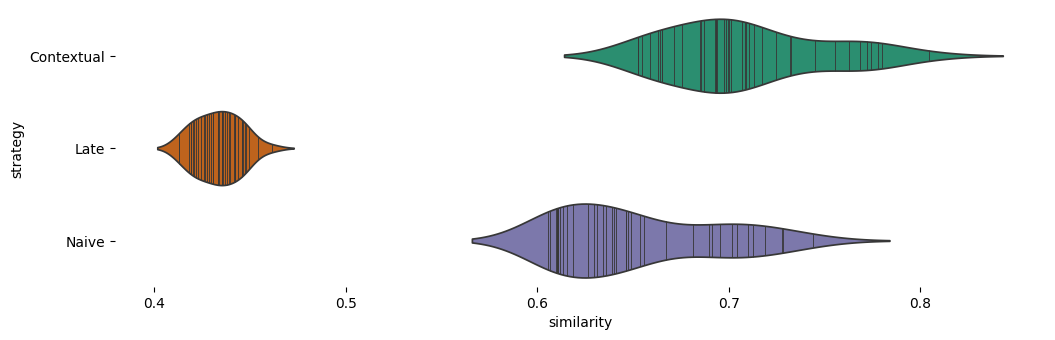

In [50]:
# @title strategy vs similarity

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(display_df['strategy'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(display_df, x='similarity', y='strategy', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [46]:
# Cell 17: Prepare Data for Top Results Visualization

if top_results_df.empty:
    print("Skipping visualization preparation as top_results_df is empty.")
else:
    print("Preparing data for TOP RESULTS visualization...")

    # --- Extract data from the top results ---
    top_embeddings_list = list(top_results_df['embedding'].values)
    top_strategies = list(top_results_df['strategy'].values)
    top_sources = list(top_results_df['source'].values)
    top_texts = list(top_results_df['text'].values)

    top_chunk_embeddings = np.array(top_embeddings_list)

    # --- Add Query and Doc Refs back for context ---
    # Ensure query_embedding, s24_doc_ref_embedding, s25_doc_ref_embedding exist
    if 'query_embedding' not in locals() or 's24_doc_ref_embedding' not in locals() or 's25_doc_ref_embedding' not in locals():
         raise NameError("Query or document reference embeddings not found.")

    embeddings_for_viz = np.vstack([
        top_chunk_embeddings,
        query_embedding.reshape(1, -1),
        s24_doc_ref_embedding.reshape(1, -1),
        s25_doc_ref_embedding.reshape(1, -1)
    ])

    # --- Create corresponding labels, sources, hover texts for the viz data ---
    viz_labels = top_strategies + ['Query', 'S24 Doc Ref', 'S25 Doc Ref']
    viz_sources = top_sources + ['Special', 'S24', 'S25'] # Assign sources to special points
    viz_hover_texts = [f"[{s}] {t[:100]}..." if len(t) > 100 else f"[{s}] {t}" for s, t in zip(top_sources, top_texts)] + \
                      [sample_query, 'S24 Full Document (Pooled)', 'S25 Full Document (Pooled)']

    print(f"Total points for visualization: {embeddings_for_viz.shape[0]}")
    if embeddings_for_viz.shape[0] != len(viz_labels): print("ERROR: Label length mismatch!")
    if embeddings_for_viz.shape[0] != len(viz_sources): print("ERROR: Source length mismatch!")
    if embeddings_for_viz.shape[0] != len(viz_hover_texts): print("ERROR: Hover text length mismatch!")


    # --- Perform Dimensionality Reduction on the SUBSET ---
    print("Performing PCA on the selected top results + references...")
    pca_viz = PCA(n_components=2)
    embeddings_2d_viz = pca_viz.fit_transform(embeddings_for_viz)
    dim_reduction_method = "PCA"
    dim1_label = f"PC 1 ({pca_viz.explained_variance_ratio_[0]:.2%})"
    dim2_label = f"PC 2 ({pca_viz.explained_variance_ratio_[1]:.2%})"

    # # --- OR --- Use UMAP (Uncomment below and comment PCA above) ---
    # import umap
    # print("Performing UMAP on the selected top results + references...")
    # reducer_viz = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42) # Adjust neighbors based on smaller N*6 points
    # embeddings_2d_viz = reducer_viz.fit_transform(embeddings_for_viz)
    # dim_reduction_method = "UMAP"
    # dim1_label = "UMAP Dimension 1"
    # dim2_label = "UMAP Dimension 2"
    # print("UMAP complete.")

    # # --- OR --- Use t-SNE (Uncomment below and comment PCA/UMAP above) ---
    # from sklearn.manifold import TSNE
    # print("Performing t-SNE on the selected top results + references...")
    # tsne_viz = TSNE(n_components=2, perplexity=min(30, embeddings_for_viz.shape[0]-1), learning_rate='auto', n_iter=1000, init='pca', random_state=42, n_jobs=-1) # Adjust perplexity
    # embeddings_2d_viz = tsne_viz.fit_transform(embeddings_for_viz.astype(np.float32))
    # dim_reduction_method = "t-SNE"
    # dim1_label = "t-SNE Dimension 1"
    # dim2_label = "t-SNE Dimension 2"
    # print("t-SNE complete.")

    print("Data preparation for visualization complete.")

Preparing data for TOP RESULTS visualization...
Total points for visualization: 123
Performing PCA on the selected top results + references...
Data preparation for visualization complete.


In [47]:
# Cell 18: Create Visualization Plot for Top Results

if 'embeddings_2d_viz' not in locals():
     print("Skipping plot creation as visualization data was not prepared.")
else:
    print("Creating Plotly visualization for TOP RESULTS...")
    fig_top = make_subplots(
        rows=1, cols=3,
        subplot_titles=('Naive Chunking', 'Late Chunking', 'Contextual Chunking'),
        shared_xaxes=True,
        shared_yaxes=True
    )

    # Define COLOR map based on SOURCE document (same as before)
    color_map = {'S24': 'blue', 'S25': 'red', 'Special': 'black'}
    # Define MARKER SYMBOL map based on STRATEGY (same as before)
    strategy_marker_map = {'Naive': 'circle', 'Late': 'square', 'Contextual': 'triangle-up'}
    strategy_list = ['Naive', 'Late', 'Contextual']

    # Define marker properties for special points (same as before)
    special_marker_map = { 'Query': 'star', 'S24 Doc Ref': 'diamond', 'S25 Doc Ref': 'diamond'}
    special_marker_size = { 'Query': 16, 'S24 Doc Ref': 12, 'S25 Doc Ref': 12}
    # Special point labels *as they appear in viz_labels*
    special_labels_in_viz = ['Query', 'S24 Doc Ref', 'S25 Doc Ref']

    unique_sources_in_viz = list(np.unique([s for s in viz_sources if s != 'Special'])) # S24, S25

    # --- Plot Top Chunks in Subplots ---
    show_legend_flags = {src: True for src in unique_sources_in_viz} # Control legend entry creation

    for col_idx, strategy in enumerate(strategy_list):
        print(f"  Processing subplot for: {strategy}")
        subplot_col = col_idx + 1

        for source in unique_sources_in_viz:
            # Find indices matching BOTH source and strategy in the viz data
            indices = [i for i, (s, strat) in enumerate(zip(viz_sources, viz_labels))
                       if s == source and strat == strategy] # Match based on viz lists

            if not indices: continue

            plot_name = f"{source} {strategy}" # Full name for hover/internal use
            legend_group = f"{source}"
            marker_symbol = strategy_marker_map[strategy]

            print(f"    Plotting {len(indices)} points for: {plot_name} in col {subplot_col}")
            fig_top.add_trace(go.Scatter(
                x=embeddings_2d_viz[indices, 0], # Use viz 2D data
                y=embeddings_2d_viz[indices, 1],
                mode='markers',
                name=source, # Legend shows only the source
                legendgroup=legend_group,
                showlegend=show_legend_flags[source],
                marker=dict(
                    color=color_map[source],
                    symbol=marker_symbol,
                    size=8, # Slightly larger since fewer points
                    opacity=0.8, # Slightly less transparent
                    line=dict(width=1, color='DarkSlateGrey')
                ),
                text=[viz_hover_texts[i] for i in indices], # Use viz hover texts
                hoverinfo='text+name'
            ), row=1, col=subplot_col)
            show_legend_flags[source] = False


    # --- Plot Special Points (Query, Doc Refs) in EACH Subplot ---
    num_top_chunk_embeddings = top_chunk_embeddings.shape[0]
    show_special_legend = True

    for col_idx, strategy in enumerate(strategy_list):
        subplot_col = col_idx + 1
        print(f"  Adding Query/DocRefs to subplot for: {strategy}")

        for i, label in enumerate(special_labels_in_viz):
            point_index = num_top_chunk_embeddings + i # Index in embeddings_for_viz and embeddings_2d_viz
            point_source = viz_sources[point_index] # Get source for color

            if point_index >= embeddings_2d_viz.shape[0]:
                 print(f"Warning: Index {point_index} out of bounds for special point '{label}'. Skipping.")
                 continue

            fig_top.add_trace(go.Scatter(
                x=[embeddings_2d_viz[point_index, 0]], # Use viz 2D data
                y=[embeddings_2d_viz[point_index, 1]],
                mode='markers+text',
                name=label,
                legendgroup='SpecialPoints',
                showlegend=show_special_legend,
                text=[f'<b>{label.replace(" Doc Ref", "")}</b>'],
                textposition="top center",
                marker=dict(
                    color=color_map[point_source],
                    symbol=special_marker_map[label],
                    size=special_marker_size[label],
                    opacity=0.95
                ),
                hoverinfo='text+name',
                hovertext=[viz_hover_texts[point_index]] # Use viz hover text
            ), row=1, col=subplot_col)
        show_special_legend = False # Turn off legend after adding first set


    print("Plot object created for top results.")

Creating Plotly visualization for TOP RESULTS...
  Processing subplot for: Naive
    Plotting 20 points for: S24 Naive in col 1
    Plotting 20 points for: S25 Naive in col 1
  Processing subplot for: Late
    Plotting 20 points for: S24 Late in col 2
    Plotting 20 points for: S25 Late in col 2
  Processing subplot for: Contextual
    Plotting 20 points for: S24 Contextual in col 3
    Plotting 20 points for: S25 Contextual in col 3
  Adding Query/DocRefs to subplot for: Naive
  Adding Query/DocRefs to subplot for: Late
  Adding Query/DocRefs to subplot for: Contextual
Plot object created for top results.


In [48]:
# Cell 19: Update Layout and Show Top Results Plot

if 'fig_top' not in locals():
     print("Skipping final plot display as fig_top was not created.")
else:
    print("Updating TOP RESULTS plot layout and displaying...")
    fig_top.update_layout(
        title_text=f"Top {N_TOP_RESULTS} Results for Query '{sample_query}' ({dim_reduction_method} Visualization)", # Title reflects top N and method
        width=1500,
        height=600,
        legend=dict(
            title="Legend",
            orientation="v",
            yanchor="top", y=1.0,
            xanchor="left", x=1.01,
            traceorder="normal",
            itemsizing='constant'
        ),
        margin=dict(l=60, r=200, t=100, b=80),
        hovermode='closest'
    )

    # Update axes titles based on the method used in Cell 17
    fig_top.update_xaxes(title_text=dim1_label)
    fig_top.update_yaxes(title_text=dim2_label)

    fig_top.update_layout(showlegend=True)

    fig_top.show()
    print("Top results plot displayed.")

Updating TOP RESULTS plot layout and displaying...


Top results plot displayed.
